<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">

<br><br><br>
<h2><font color="#00586D" size=5>Capstone XI: Advanced Cloud Services</font></h2>



<h1><font color="#00586D" size=6>Billboard</font></h1>

<br><br>
<div style="text-align: right">
<font color="#00586D" size=3>Juan Ignacio Alonso Barba, Jesus Martínez Gómez</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud III </font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. Introduction](#section1)* [2. Architecture presentation](#section2)
* [3. Actions to take](#section3)

---

<a id="section1"></a>
# <font color="#00586D"> 1. Introduction</font>

The objective of this capstone is to effectively combine some of the knowledge obtained in module 11.

The Capstone has a decidedly practical approach, so that its resolution will allow students to deploy a small application in the cloud that, on a recurring basis, consults the status of movie listings through calls to an API. third parties. The result of these queries will be stored through AWS storage services. In addition, the most relevant data will be stored in a non-relational database, which will allow future queries to be made through an API built on Lambda functions.

Validation of the developed application can be carried out from the current notebook.

Any student can feel free to expand the Capstone objectives.

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section2"></a>
# <font color="#00586D"> 2. Presentation of the </font> architecture

During the Capstone an application will be developed and deployed with the following functionality:
<ol type="A">
    <li> It will query data through an external API, which allows obtaining information about the movies that are currently showing in theaters. Initially, queries will be made through the use of the request library within the current notebook </li>
    <li> It will store the data obtained with each call, in the form of .json files, using the AWS S3 storage service. These files will be organized by a name that reflects the date on which they were obtained</li>
    <li> It will keep a database, created in AWS DynamoDB, updated with a series of key data for every movie for which we have obtained information. The update process will start when new files are present in AWS S3.
    <li> It will offer queries to the database that allow obtaining movies that meet certain conditions </li>
        <ol>
            <li> Movies released in a specific month </li>
            <li> Movies with a rating above a threshold</li>
        </ol>
    <li> Will automate queries to the external API through the deployment of an AWS Lambda function</li>
    <li> Will offer database queries through an API deployed with API Gateway + AWS Lambda</li>
</ol>

The architecture of the application is shown in the following image:
  

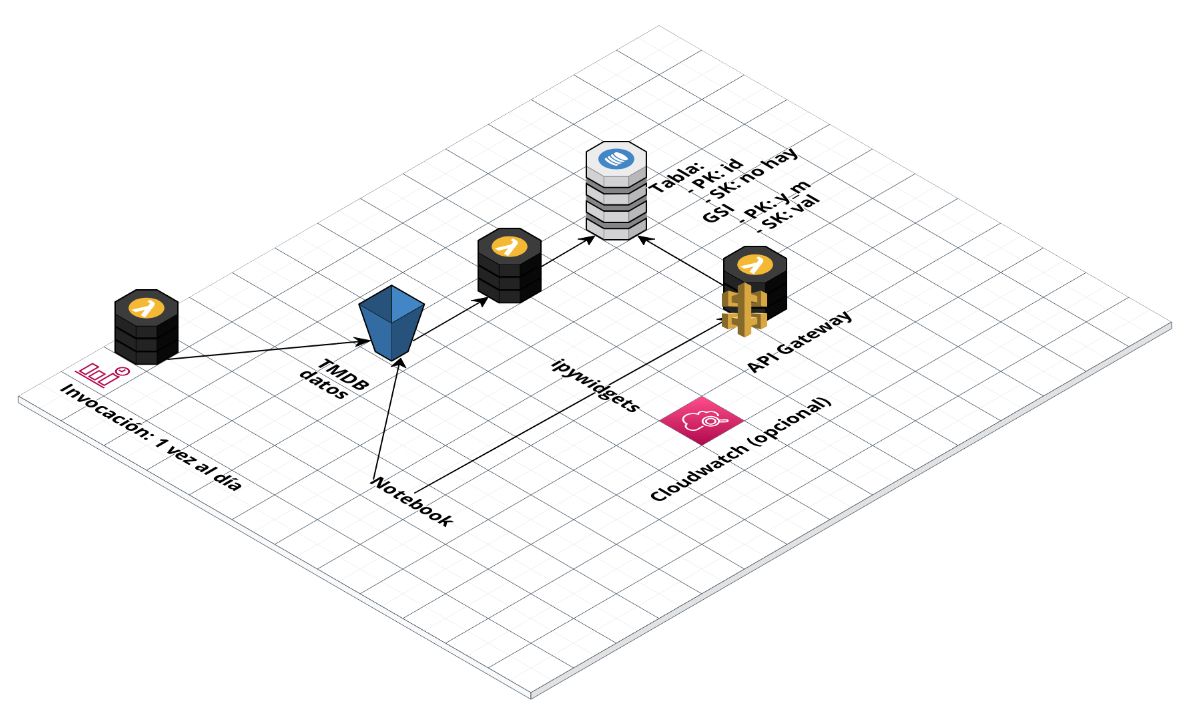<img src="img/arquitectura.png" alt="Arquitectura del capstone">

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section3"></a>
# <font color="#00586D" size=5> 3. Actions to perform </font>

In this section a series of exercises are proposed. Each exercise incrementally extends the functionality of the application.

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 0:</b></font> Using the API "The Movie Database API"

As has been seen in other modules, to consume the API we must obtain an `API Key` that identifies us during our queries.

The TMDb API requires authentication, so to work with it it is necessary, first of all, to have a user. Once registered on the site, it is necessary to request a key to use the API. Detailed instructions are shown on this page ([link](https://developers.themoviedb.org/3/getting-started/introduction)). This process is simple, and basically consists of 3 steps:

- Enter the personal account settings.
- Enter the API menu.
- Create the API and identify the token (we will use it as `API KEY`)

 
Once the API is obtained, we can use it to make any query included in the documentation (https://developers.themoviedb.org/3/movies).

During the capstone, we will use the now_playing call, which gives us the following data for each film currently projected in theaters:

- poster_path: string with values ​​to generate a URL to the movie poster
- adult: boolean value that tells us if it is an adult movie or not
- overview: string with the summary of the movie
- release_date: string with the release date
- id: integer number that serves as a unique identifier
- popularity: integer with the current popularity
- vote_average: integer with the average value of the votes cast to date
- vote_count: integer indicating the number of votes cast
- other fields that we can consult from https://developers.themoviedb.org/3/movies/get-now-playing

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

Using some POSTMAN type tool, make a call to the URL https://api.themoviedb.org/3/movie/now_playing?api_key=YOUR_KEY replacing YOUR_KEY with the personal API Key.

Paste the data obtained for the first 3 movies in the following cell:

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 1:</b></font> Query through requests

- Fill in the code cell below to make a query using the requests library
  - Include the value of the API KEY previously obtained
- Knowing that the data is obtained ordered by popularity, add a value to each result called rank with the position of the movie
   - The movie in position 0 of the array will have the ranking value 1
   - The movie in position 1 of the array will have the ranking value 2
   - The movie in position n-1 of the array will have the ranking value n

In [1]:
import requests
API_KEY = "8440ec54b30f5abe59fd822893eec8d0"
response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={API_KEY}")
dic = response.json()

In [2]:
for i, result in enumerate(dic["results"]):
    result["rank"] = i + 1

In [3]:
dic

{'dates': {'maximum': '2023-09-08', 'minimum': '2023-07-22'},
 'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/8pjWz2lt29KyVGoq1mXYu6Br7dE.jpg',
   'genre_ids': [28, 878, 27],
   'id': 615656,
   'original_language': 'en',
   'original_title': 'Meg 2: The Trench',
   'overview': 'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.',
   'popularity': 7689.373,
   'poster_path': '/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg',
   'release_date': '2023-08-02',
   'title': 'Meg 2: The Trench',
   'video': False,
   'vote_average': 7.1,
   'vote_count': 1232,
   'rank': 1},
  {'adult': False,
   'backdrop_path': '/jZIYaISP3GBSrVOPfrp98AMa8Ng.jpg',
   'genre_ids': [16, 35, 10751, 14, 10749],
   'id': 976573,
   'original_language': 'en',
   'original_title': 'Elemental',
   'overview': 'In a city where fire, water, land and air

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

Using the previous code, paste the data obtained for the first 3 movies (including the rank field) in the following cell:

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 2:</b></font> Uploading data to S3

- Create an S3 bucket with the name `mcidaen3.capstone11.movies.raw.data.<tu-nombre>`.
  - We will do it from the AWS console
- Fill in the code cell below so that, after querying data from the Movies API and including the rank field, an object is generated for each result
- Path of the object to create /movies/ID_MOVIE/YEAR_MONTH_DAY.json
  - ID_MOVIE corresponds to the id of the movie
  - YEAR/MONTH/DAY with the date of the consultation
  
 For example, if the query obtains 4 movies, the execution of the cell must generate 4 .json files that will be uploaded, using the boto3 library, to the S3 bucket as objects

In [4]:
import requests
import json
import boto3    
from datetime import datetime

NOMBRE_BUCKET = "mcidaen3.capstone11.movies.raw.data.laura.serrano.ramos" # Creado desde la consola de AWS 
now = datetime.now()
year_month_day = now.strftime("%Y_%m_%d") # Obtener dígitos del año, mes y día


# 1.- OBTENER DATOS DEL API MOVIES DB (COPIAD DEL EJERCICIO 1)

API_KEY = "8440ec54b30f5abe59fd822893eec8d0"
response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={API_KEY}")
dic = response.json()
for i, result in enumerate(dic["results"]):
    result["rank"] = i + 1
    
# 2.- CONFIGURAD EL CLIENTE Y RECURSO DE ACCESO A S3, Y VALIDAD SU USO (CREACIÓN DE CARPETA)
    
s3_client = boto3.client('s3', region_name='us-east-1')
s3_resource = boto3.resource('s3', region_name='us-east-1')

try:
    s3_client.put_object(Bucket=NOMBRE_BUCKET, Key='movies/')
    print('Carpeta creada correctamente')
except Exception as e:
    print(e) 


# 3.- SUBID A S3 UN OBJETO POR RESULTADO OBTENIDO EN EL PASO 1



for result in dic["results"]:
    
    ID_MOVIE = result["id"]
    AÑO_MES_DIA = result["release_date"]
    
    json_file_path = f"/movies/{ID_MOVIE}/{AÑO_MES_DIA}.json"

    #with open(json_file_path, 'r') as json_file:
    #json_data = json_file.read()
    
    cuerpo_objeto = json.dumps(result)
    
    s3_client.put_object(Bucket=NOMBRE_BUCKET, Key=json_file_path, Body=cuerpo_objeto)
...

Carpeta creada correctamente


Ellipsis

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

- Run the previous code and check that entries have been generated in S3
- Generate an image, with a screenshot that shows the contents of the movies folder in S3, and save it in the path (next to the notebook) `/img/eje_2.png`

As seen in the images, the entries have been generated successfully in s3:
</b>
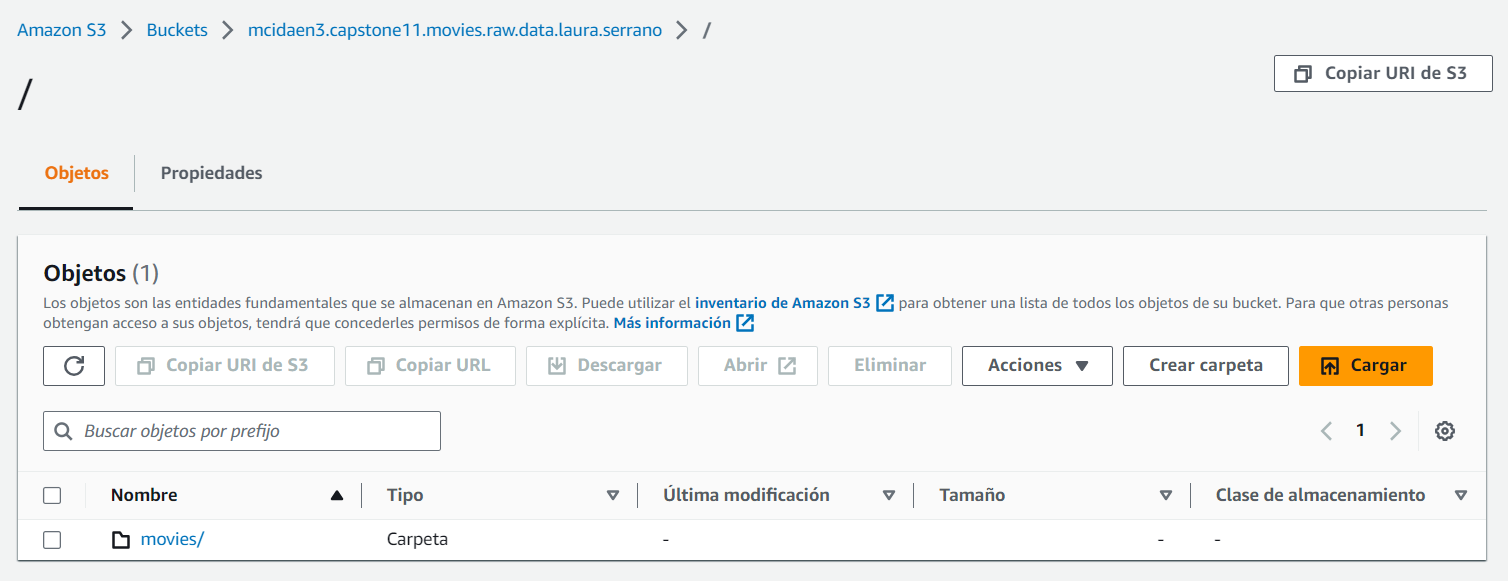
</b>
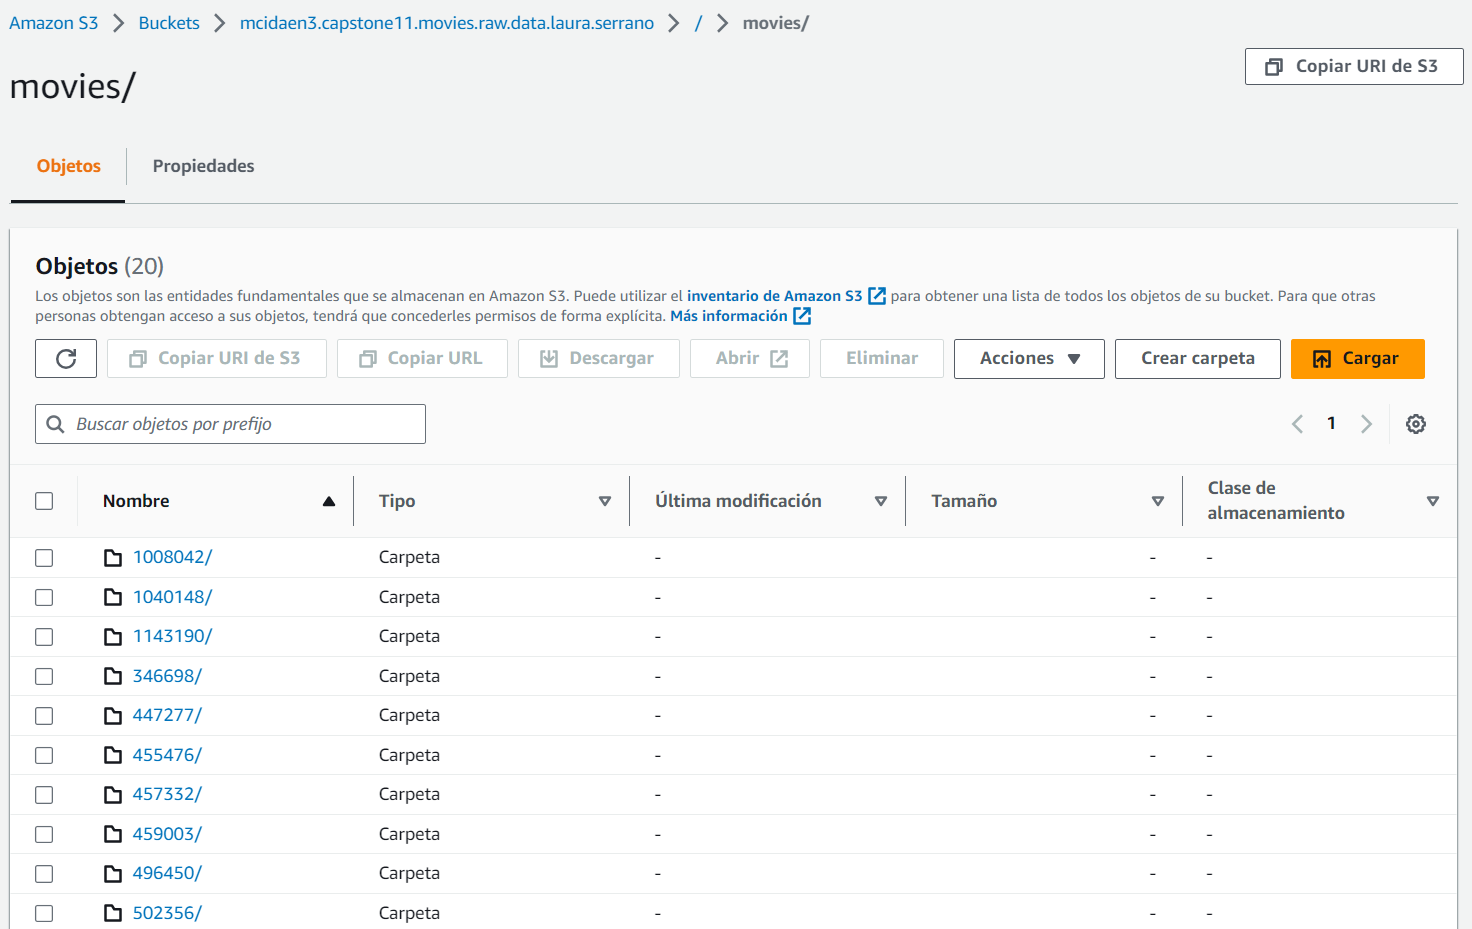
</b>
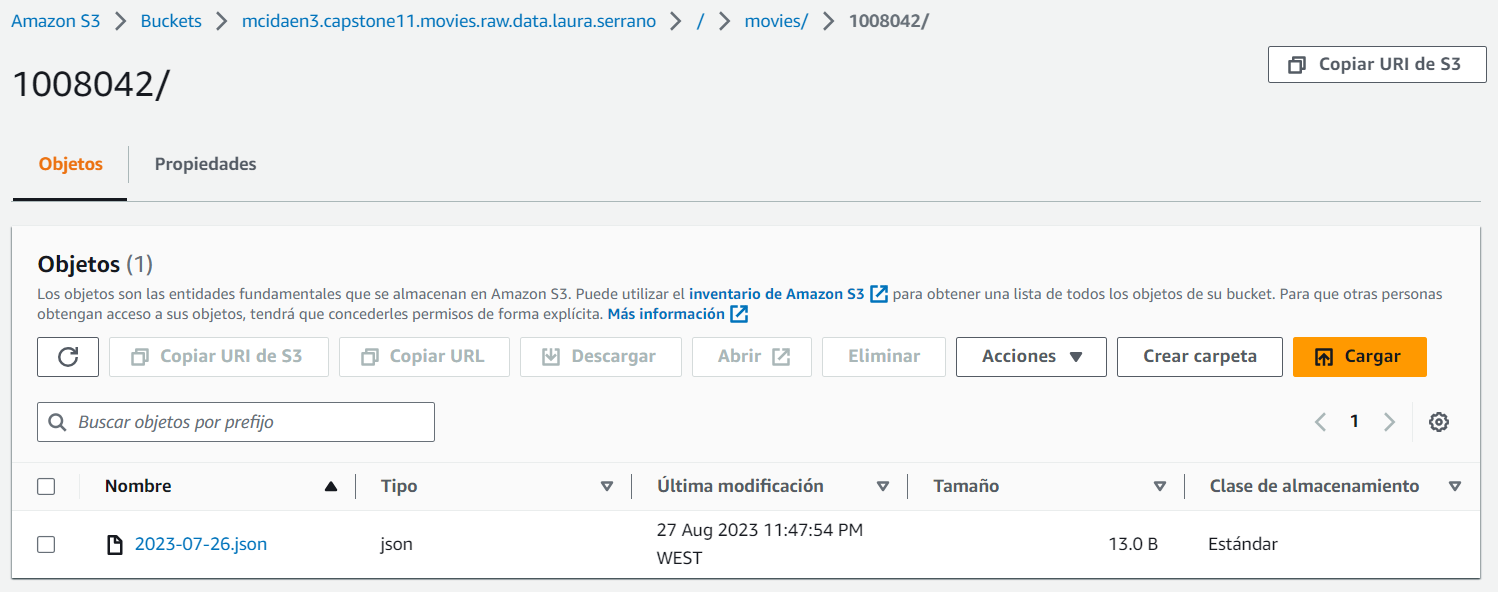
</b>
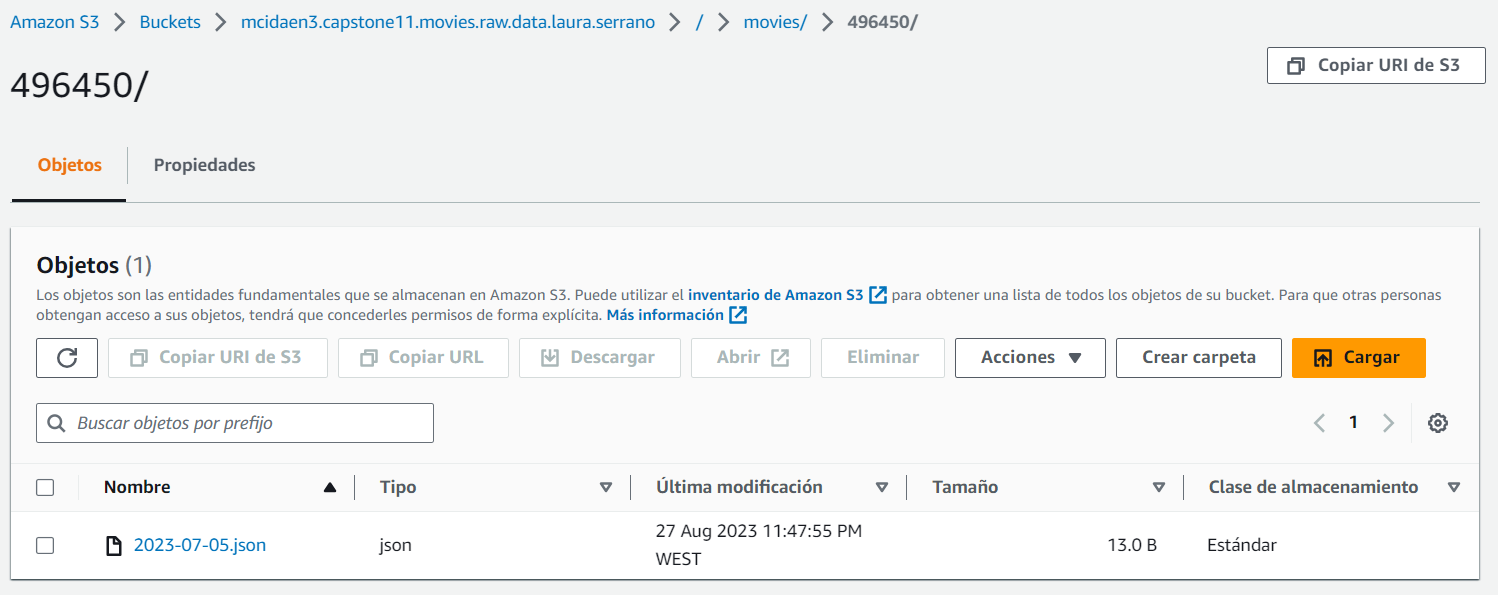

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 3:</b></font> Storing data in DynamoDB

For easy future reference, we are going to store movie data in a DynamoDB database. To do this, we will create a DynamoDB table through the AWS console with the following configuration:

- Name: MoviesDB
- Partition Key: id (string)
- Global Secondary Index
  - Partition Key: y_m (string)
     - Represents the release date of the movie (release_date)
     - Composed of the year (4 digits) and month (2 digits). For example 2023_01
  - Sort Key: val (number)

To validate the created table, we are going to generate an entry through boto3. To do this, fill in code cell 3.1 so that the first result queried from the API can be saved in DynamoDB

In [5]:
# CELDA 3.1

import requests
import json
import boto3    
from decimal import Decimal

NOMBRE_TABLA = "MoviesDB"

# 1.- OBTENER DATOS DEL API MOVIES DB (COPIAD DEL EJERCICIO 1)
API_KEY = "8440ec54b30f5abe59fd822893eec8d0"
response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={API_KEY}")
dic = response.json()
for i, result in enumerate(dic["results"]):
    result["rank"] = i + 1

# 2.- CONFIGURAD EL RECURSO Y TABLA DE DYNAMO_DB
    
dynamodb_resource = boto3.resource('dynamodb', region_name='us-east-1')
dybamodb_table = dynamodb_resource.Table(NOMBRE_TABLA)

# 3.- MODIFICAD EL FORMATO DE LOS DATOS OBTENIDOS PARA QUE PUEDAN GUARDARSE EN DYNAMO_DB

results = dic["results"]
for i in range(len(results)):
    results[i]["id"] = str(results[i]["id"])

# 4.- GUARDAD UNA ÚNICA ENTRADA EN DYNAMO DB, USANDO EL MÉTODO A CONTINUACIÓN

single_element = results[0]
dybamodb_table.put_item(Item=json.loads(json.dumps(single_element), parse_float=Decimal))

{'ResponseMetadata': {'RequestId': 'NF6T7ATJGNIK0Q5SS13HCS3JKRVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Sun, 03 Sep 2023 13:56:42 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '2',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'NF6T7ATJGNIK0Q5SS13HCS3JKRVV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2745614147'},
  'RetryAttempts': 0}}

In [6]:
results[0]

{'adult': False,
 'backdrop_path': '/8pjWz2lt29KyVGoq1mXYu6Br7dE.jpg',
 'genre_ids': [28, 878, 27],
 'id': '615656',
 'original_language': 'en',
 'original_title': 'Meg 2: The Trench',
 'overview': 'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.',
 'popularity': 7689.373,
 'poster_path': '/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg',
 'release_date': '2023-08-02',
 'title': 'Meg 2: The Trench',
 'video': False,
 'vote_average': 7.1,
 'vote_count': 1232,
 'rank': 1}

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

- Run the previous code and check that an entry has been generated in DynamoDB
- Generate an image, with a screenshot that shows the content of the movies table in DynamoDB, and save it in the path (next to the notebook) `/img/eje_3.png`
- Paste the final content of the lambda in cell 3.2

Through the following images it can be seen that the entries have been generated satisfactorily:
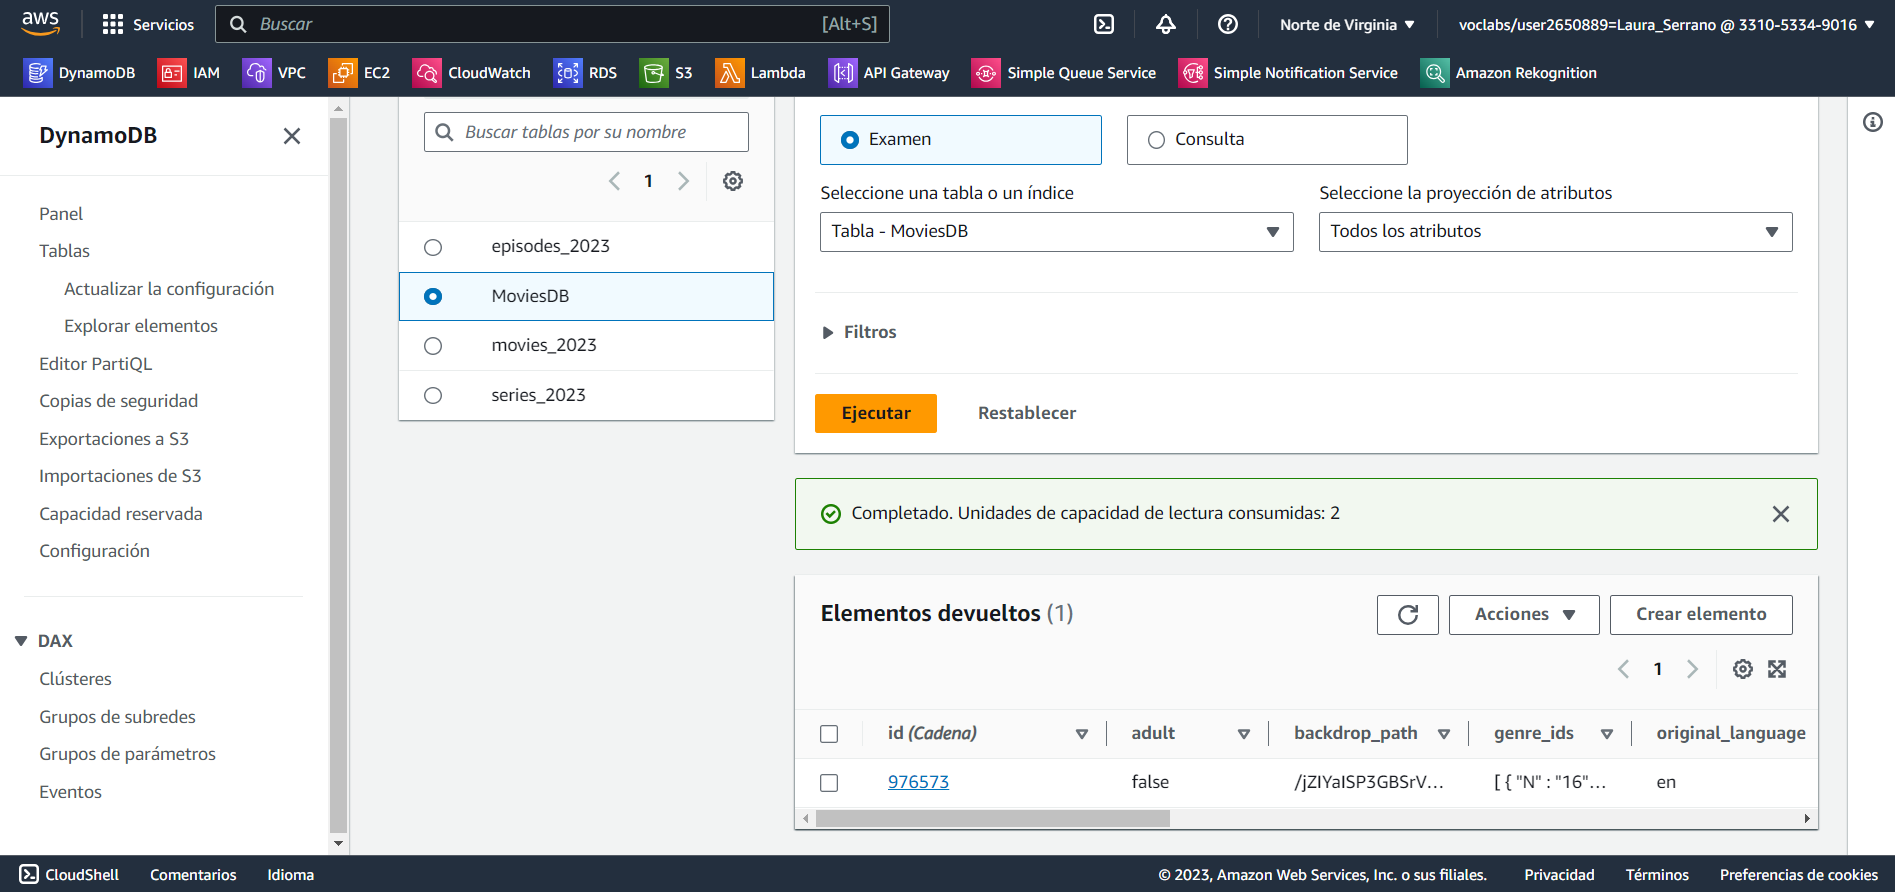
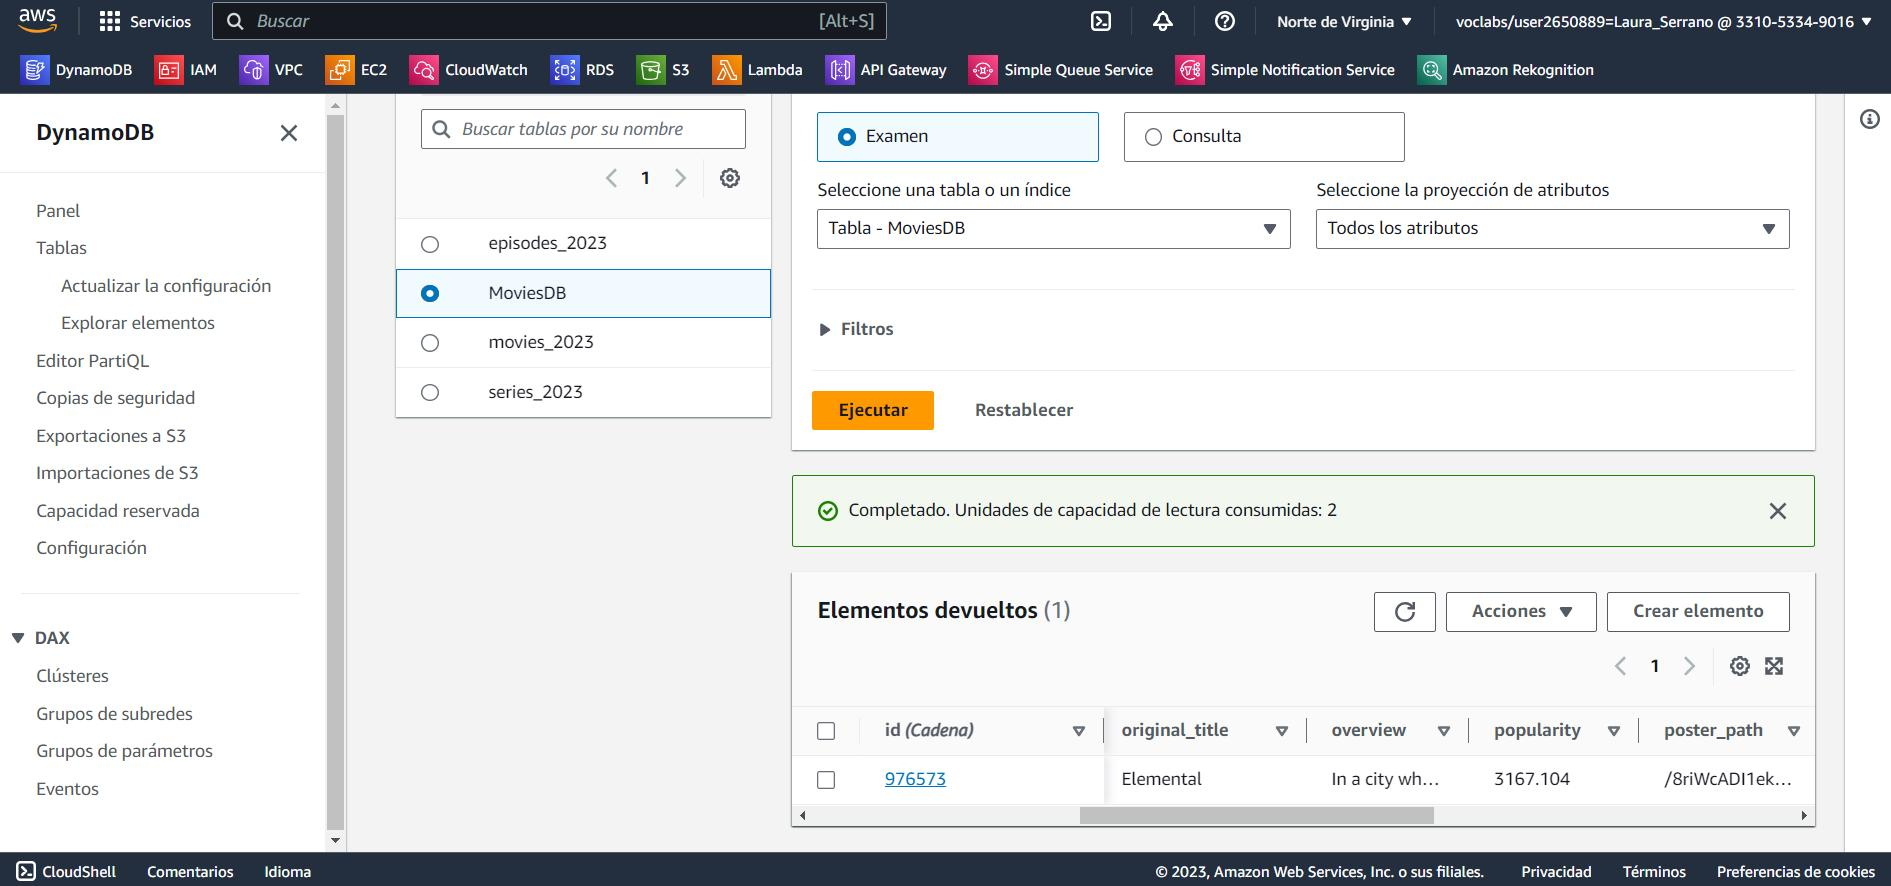
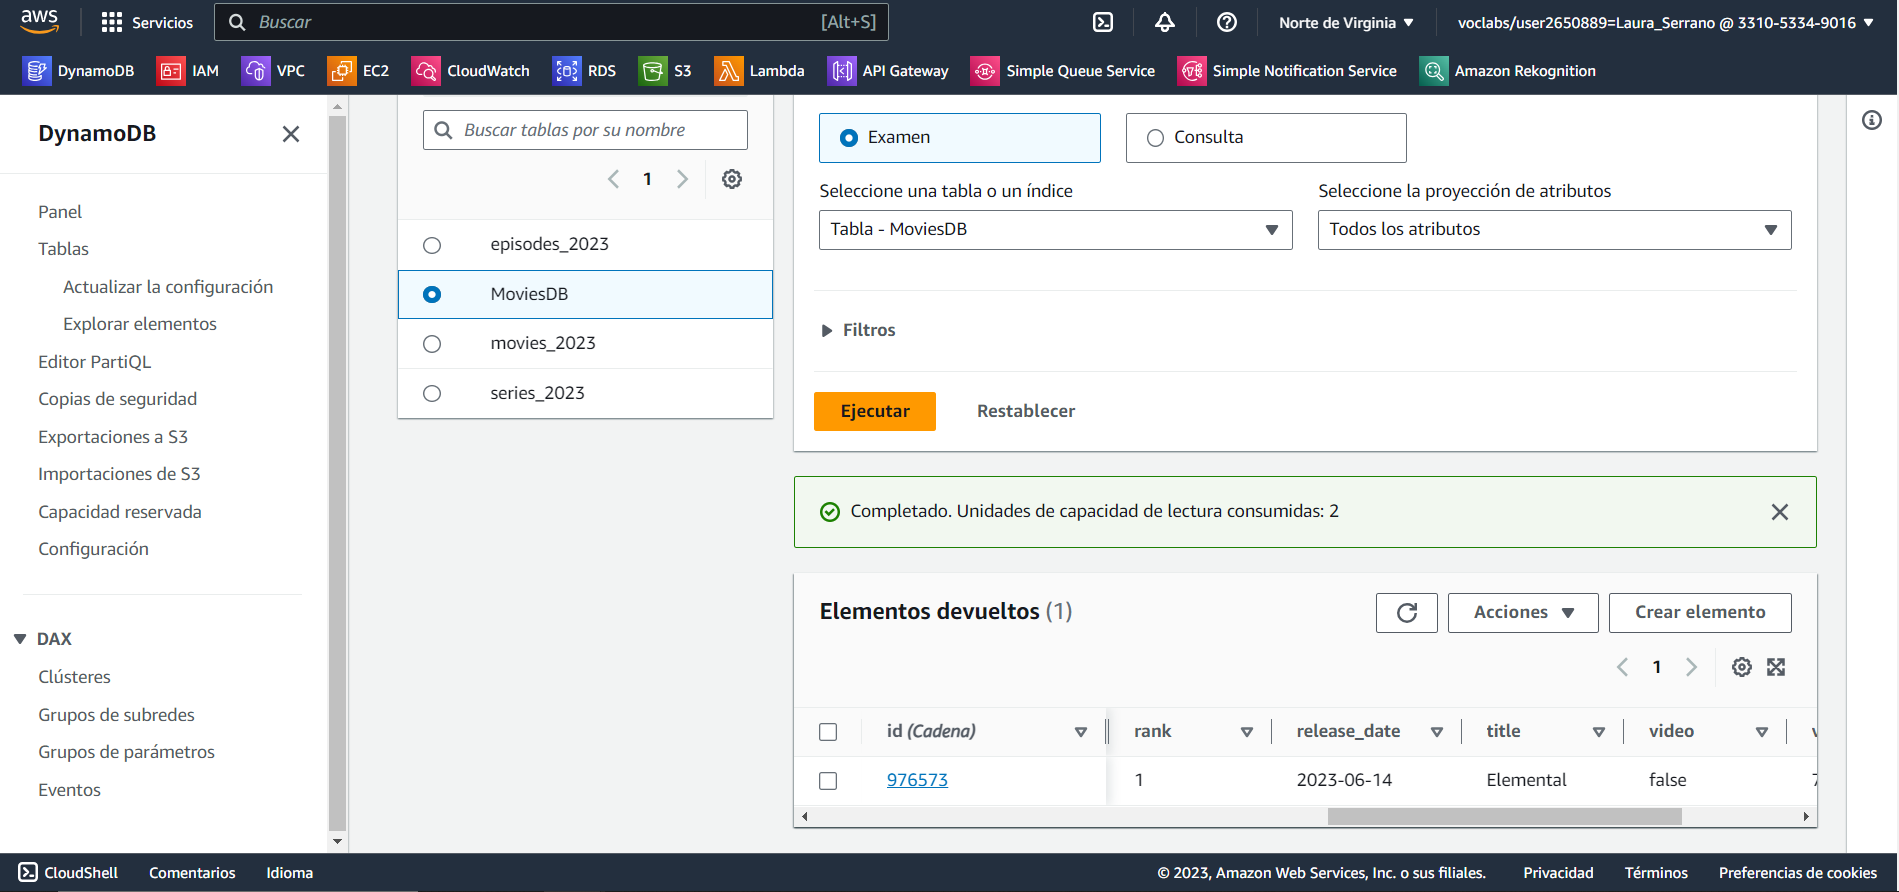
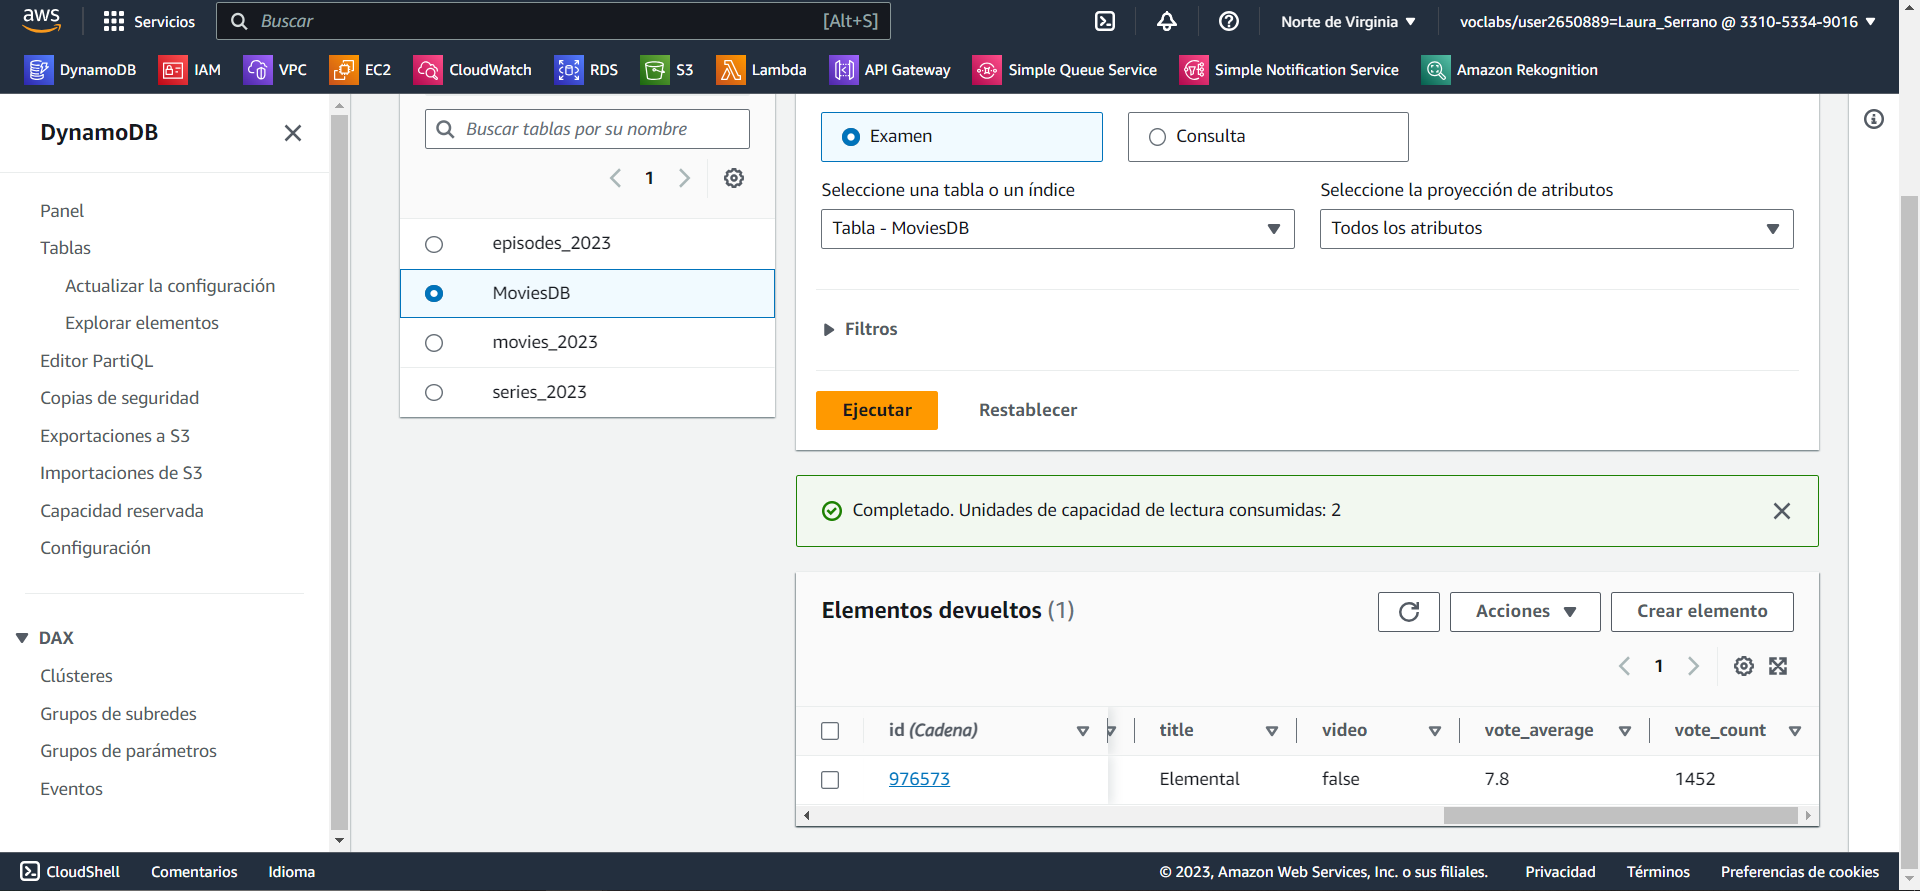

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 4:</b></font> Process automation

We want to automate the process of adding/updating data in our DynamoDB table. To do this, we will use a lambda function with the following characteristics:

- Should be run after the creation of any object in the previously created S3 bucket, under the path /movies
  - We will achieve it through a trigger
- If no previous entry exists for the movie, an entry will be created once appropriate fields for partition and sort keys have been generated
  - Partition key: id
  -GSI
      - Partition key: y_m
      - Sort key: val
      
In addition, it will have two "special" fields with the following characteristics:
  - rank_hist
    - It will represent a dictionary with the evolution of the film's position in the rankings over the weeks
    - To do this, it will have an entry for each week in which the value obtained has been consulted, where date will have the format year_nWeek (number of the week/year in which the ranking has been consulted).
      - Year will be represented by 4 digits
      - nWeek will be represented by 2 digits
    - If we make a request on January 15, we will be in week 2, while on the 16th we will be in week 3
    - For the most popular movie, we will add the entry
        - rank_hist = {"2023_02", 1}
  - until_date
    - It will help us to check the number of days that a movie has been showing
    - Will save the date of the query in the same format as the release_date field (provided by the MoviesDB API)
        - yyyy-mm-dd
        
- In case an entry already exists, we will update its values ​​so that we "can" have the following changes
    - New value for current rating
      - Valley field
    - Update field until_date
    - New entry in the rank_hist field with the value of the current week

To do this, the following actions must be carried out:

- Develop in code cell 4.1 the code that is responsible for creating/updating entries in DynamoDB, using previously obtained data
- In the AWS console, create a lambda function that executes the S3 actions indicated above
    - Include an S3 trigger upon creation of any object
- Deploy the code developed in cell 4.1 in the previous lambda function
- Modify the code so that the data is obtained from the lambda event
  - The event includes the Bucket and key of the S3 object that triggered the execution (.json file)
  - Use boto3 to read the content of the file
  - Cell 4.2 includes some code that may help
- Deploy the lambda function after the changes
- Run some previous cell that generates S3 entries from Movie API calls and check the result
  - We can also download and upload some of the .json that are already in the bcuket, using the AWS console

In [7]:
json.dumps(result)

'{"adult": false, "backdrop_path": "/7drO1kYgQ0PnnU87sAnBEphYrSM.jpg", "genre_ids": [16, 28, 27], "id": "1083862", "original_language": "ja", "original_title": "\\u30d0\\u30a4\\u30aa\\u30cf\\u30b6\\u30fc\\u30c9\\uff1a\\u30c7\\u30b9\\u30a2\\u30a4\\u30e9\\u30f3\\u30c9", "overview": "In San Francisco, Jill Valentine is dealing with a zombie outbreak and a new T-Virus, Leon Kennedy is on the trail of a kidnapped DARPA scientist, and Claire Redfield is investigating a monstrous fish that is killing whales in the bay. Joined by Chris Redfield and Rebecca Chambers, they discover the trail of clues from their separate cases all converge on the same location, Alcatraz Island, where a new evil has taken residence and awaits their arrival.", "popularity": 439.217, "poster_path": "/qayga07ICNDswm0cMJ8P3VwklFZ.jpg", "release_date": "2023-06-22", "title": "Resident Evil: Death Island", "video": false, "vote_average": 7.6, "vote_count": 615, "rank": 20}'

In [8]:
# CELDA 4.1

dynamodb = boto3.client('dynamodb', region_name='us-east-1')
today = datetime.today()
main_dict = {}

# COPIAD EL CÓDIGO DEL EJERCICIO 3 E INTEGRAD LA LÓGICA PARA CREAR (SI NO EXISTEN) O ACTUALIZAR (SI EXISTEN) ENTRADAS
NOMBRE_TABLA = "MoviesDB"

# 1.- OBTENER DATOS DEL API MOVIES DB (COPIAD DEL EJERCICIO 1)
API_KEY = "8440ec54b30f5abe59fd822893eec8d0"
response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={API_KEY}")
dic = response.json()
for i, result in enumerate(dic["results"]):
    result["rank"] = i + 1
    result["until_date"] = today.strftime('%Y-%m-%d')
    
    # Obtenemos año y numero de semana
    year_week_number = f"{today.strftime('%Y')}_{today.strftime('%W')}"

    # Obtenemos los datos existentes o creamos una lista vacia
    rank_hist = result.get("rank_hist", [])

    # unimos los datos actuales a los ya hayados
    rank_hist.append({year_week_number: f"{result['rank']}"})

    # Actualizamos el diccionario
    result["rank_hist"] = rank_hist
    
# 2.- CONFIGURAD EL RECURSO Y TABLA DE DYNAMO_DB
    
dynamodb_resource = boto3.resource('dynamodb', region_name='us-east-1')
dybamodb_table = dynamodb_resource.Table(NOMBRE_TABLA)

# 3.- MODIFICAD EL FORMATO DE LOS DATOS OBTENIDOS PARA QUE PUEDAN GUARDARSE EN DYNAMO_DB

results = dic["results"]
for result in results:
    result["id"] = str(result["id"])
    
    #Miramos si el campo id existe
    response = dynamodb.get_item(
        TableName=NOMBRE_TABLA,
        Key={'id': {'S': result['id']}}
    )

    if "Item" in response:
        # Si existe, actualizamos los atributos
        dynamodb.update_item(
            TableName='MoviesDB',
            Key={
                'id': {'S': result["id"]}
            },
            UpdateExpression='SET #rankHistAttr = :rankHistValue, #untilDateAttr = :untilDateValue',
            ExpressionAttributeNames={
                '#rankHistAttr': 'rank_hist',
                '#untilDateAttr': 'until_date'
            },
            ExpressionAttributeValues={
                ':rankHistValue': {'M': {list(result["rank_hist"][-1].keys())[0]: {'N': list(result["rank_hist"][-1].values())[0]}}},
                ':untilDateValue': {'S': result["until_date"]}
            }
        )
        print(f"Updated item with id {result['id']}")
    
    else:
        dybamodb_table.put_item(Item=json.loads(json.dumps(result), parse_float=Decimal))


Updated item with id 615656


In [9]:
#Celda 4.2 para funcion Capstone11-Cidaen-LauraSerrano

import boto3
import json
import botocore
from datetime import datetime


def lambda_handler(event, context):
    
    today = datetime.today()
    main_dict = {}
    i = 0
    NOMBRE_TABLA = "MoviesDB"
    s3_resource = boto3.resource('s3', region_name='us-east-1')
    dynamodb = boto3.client('dynamodb')
    dynamo_resource = boto3.resource('dynamodb', region_name='us-east-1')
    dynamo_table = dynamo_resource.Table(NOMBRE_TABLA)
    
    for record in event.get('Records', []):
        # 1 LEER DATOS DESDE S3
        bucket = record["s3"]["bucket"]["name"]
        key = record["s3"]["object"]["key"]
        obj = s3_resource.Object(bucket, key)
        element = json.load(obj.get()['Body'])                
        # COMPLETAD CON CODIGO
        element["rank"] = i + 1
        element["until_date"] = today.strftime('%Y-%m-%d')
    
        # Obtenemos año y numero de semana
        year_week_number = f"{today.strftime('%Y')}_{today.strftime('%W')}"

        # Obtenemos los datos existentes o creamos una lista vacia
        rank_hist = element.get("rank_hist", [])

        # unimos los datos actuales a los ya hayados
        rank_hist.append({year_week_number: f"{element['rank']}"})

        # Actualizamos el diccionario
        element["rank_hist"] = rank_hist
        element["id"] = str(element["id"])
    
        #Miramos si el campo id existe
        response = dynamodb.get_item(
            TableName=NOMBRE_TABLA,
            Key={'id': {'S': element['id']}}
        )

        if "Item" in response:
            # Si existe, actualizamos los atributos
            dynamodb.update_item(
                TableName='MoviesDB',
                    Key={
                    'id': {'S': element["id"]}
                },
                UpdateExpression='SET #rankHistAttr = :rankHistValue, #untilDateAttr = :untilDateValue',
                ExpressionAttributeNames={
                    '#rankHistAttr': 'rank_hist',
                    '#untilDateAttr': 'until_date'
                },
                ExpressionAttributeValues={
                    ':rankHistValue': {'M': {list(element["rank_hist"][-1].keys())[0]: {'N': list(element["rank_hist"][-1].values())[0]}}},
                    ':untilDateValue': {'S': element["until_date"]}
                }
            )
            print(f"Updated item with id {element['id']}")
    
        else:
            dybamodb_table.put_item(Item=json.loads(json.dumps(element), parse_float=Decimal))
        
        i = i+1
        
        print("la funcion se ejecuta correctamente")

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

- Check that when uploading a file to S3 with data from a movie, the lambda that we just displayed is executed
- Check that the lambda function is executed without errors
- Force the generation of files in S3 through the execution of previous cells
- Generate an image, with a screenshot that shows the monitoring of the lambda function during the last 15 minutes, and save it in the path (next to the notebook) `/img/eje_4_a.png`
- Generate an image, with a screenshot that shows the entries in the DynamoDB table, and save it in the path (next to the notebook) `/img/eje_4_b.png`
- Paste the final content of the lambda in cell 4.3

The final content of the lambda is in cell 4.2

The lambda function that we have generated is executed, in the csv file it is observed that initially there were errors in the code that I solved by modifying the code in such a way that it now executes without errors. These are screenshots of the function monitoring:
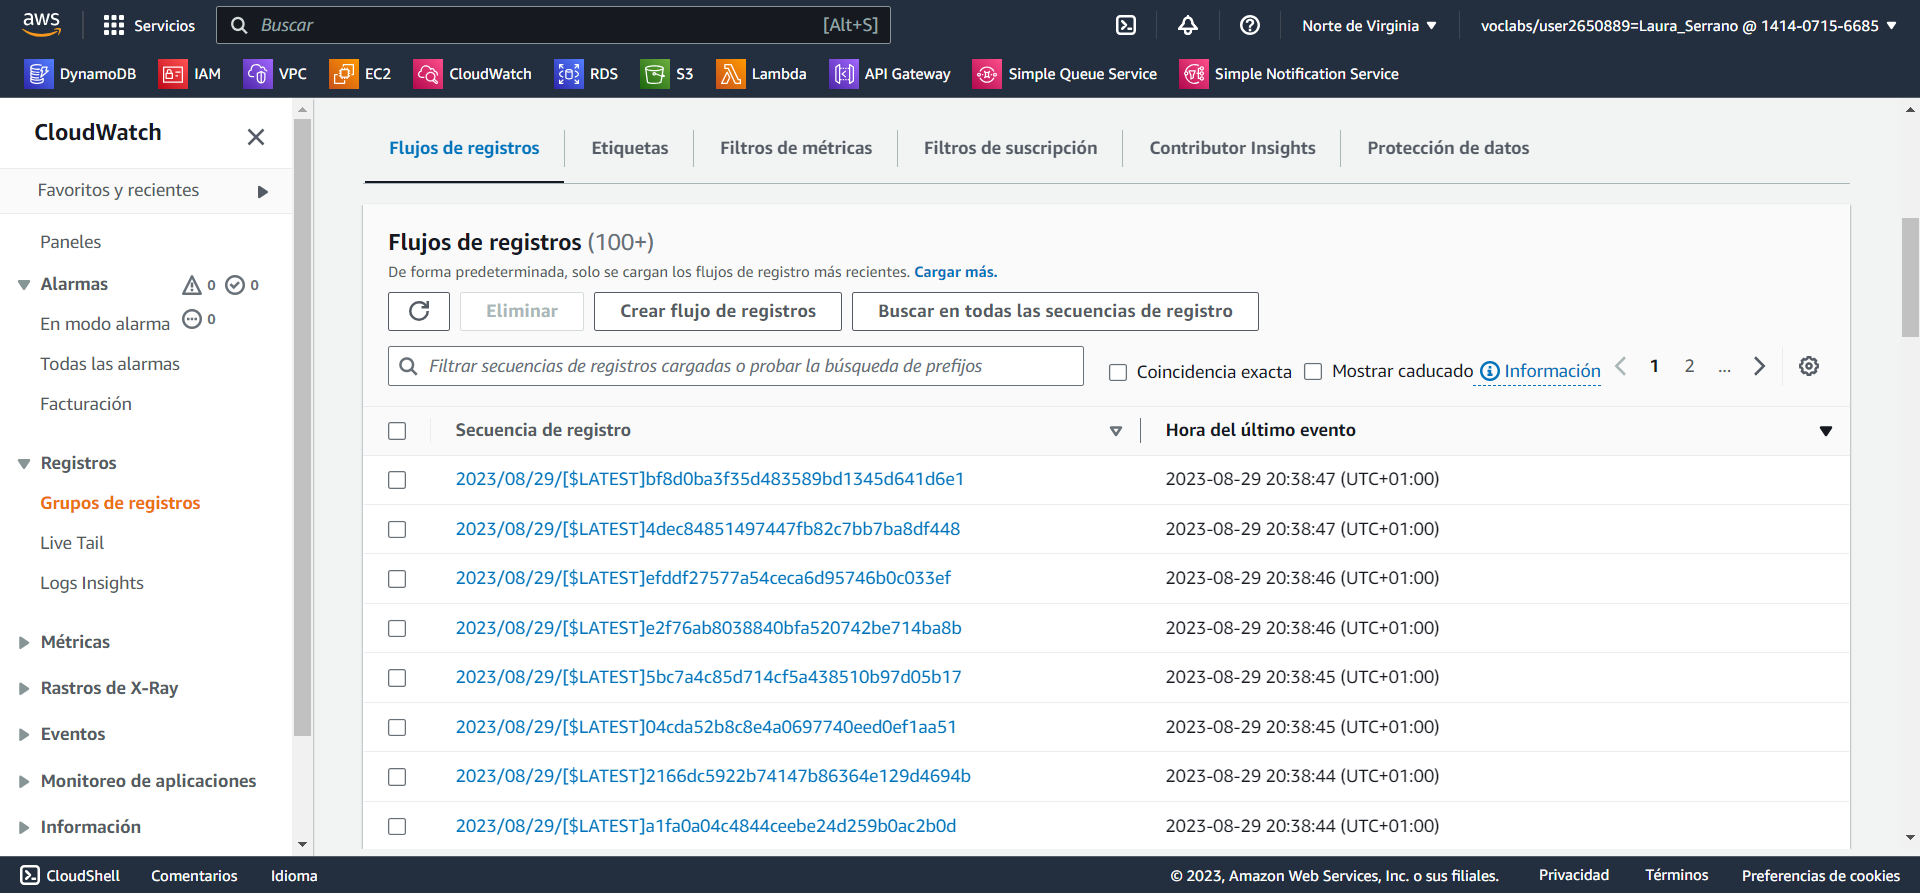
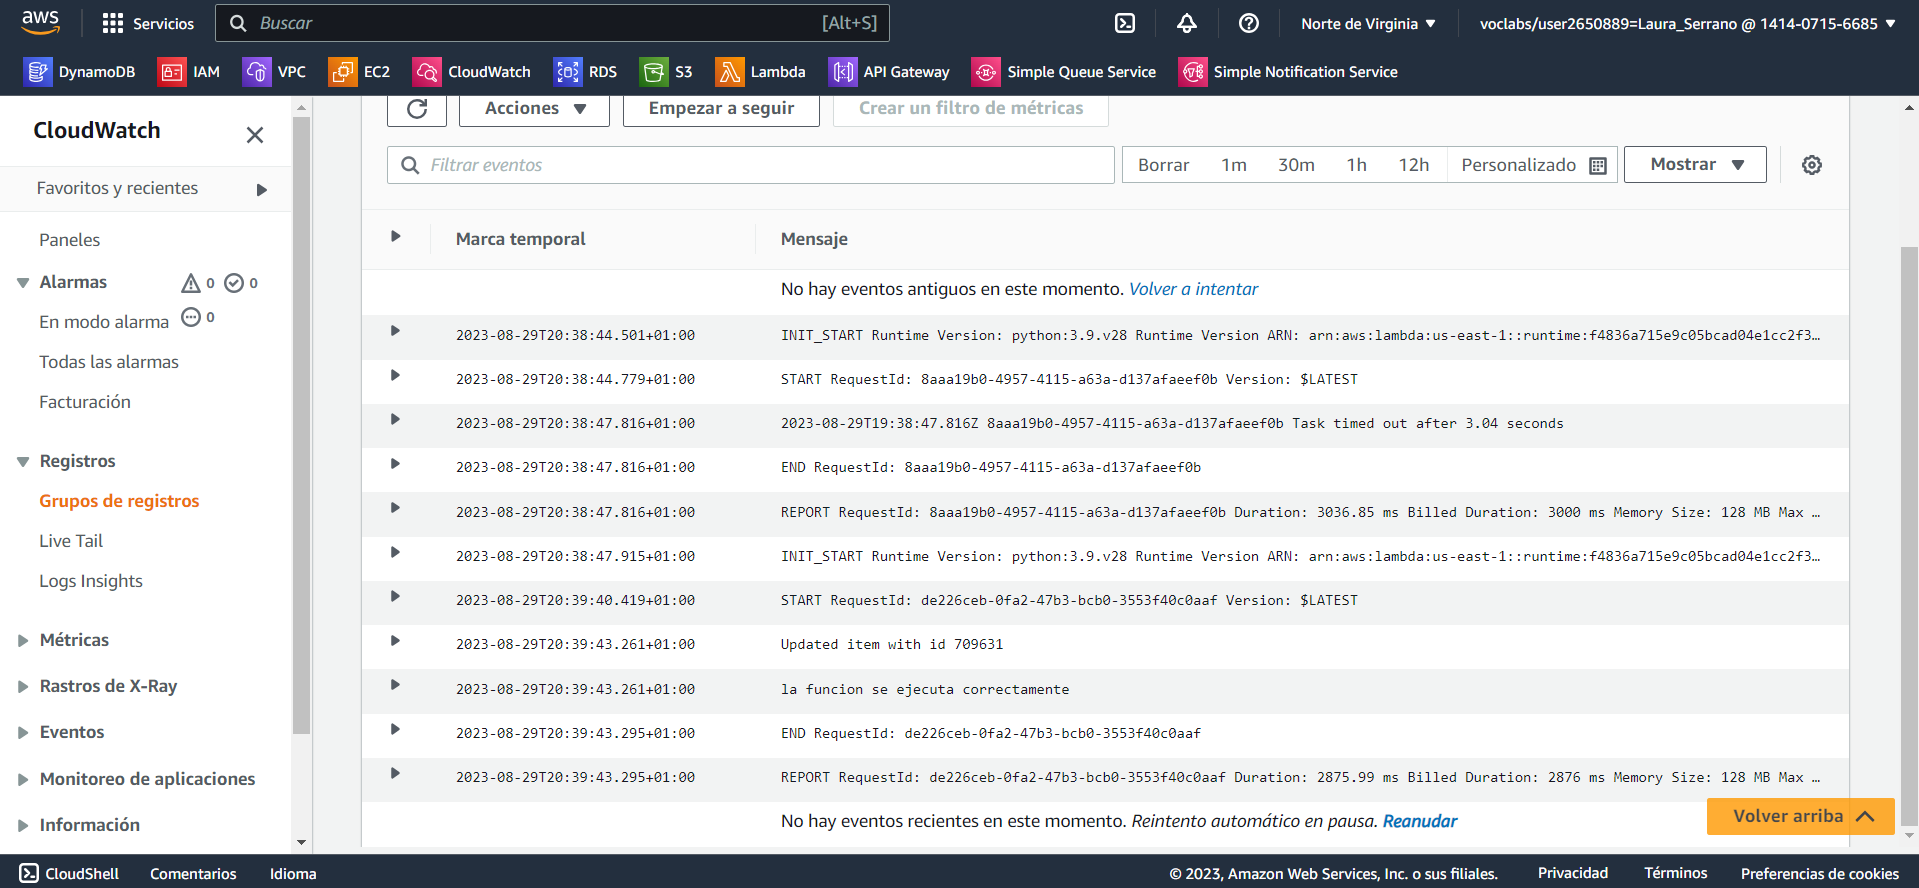
These are screenshots of the file generation in s3:
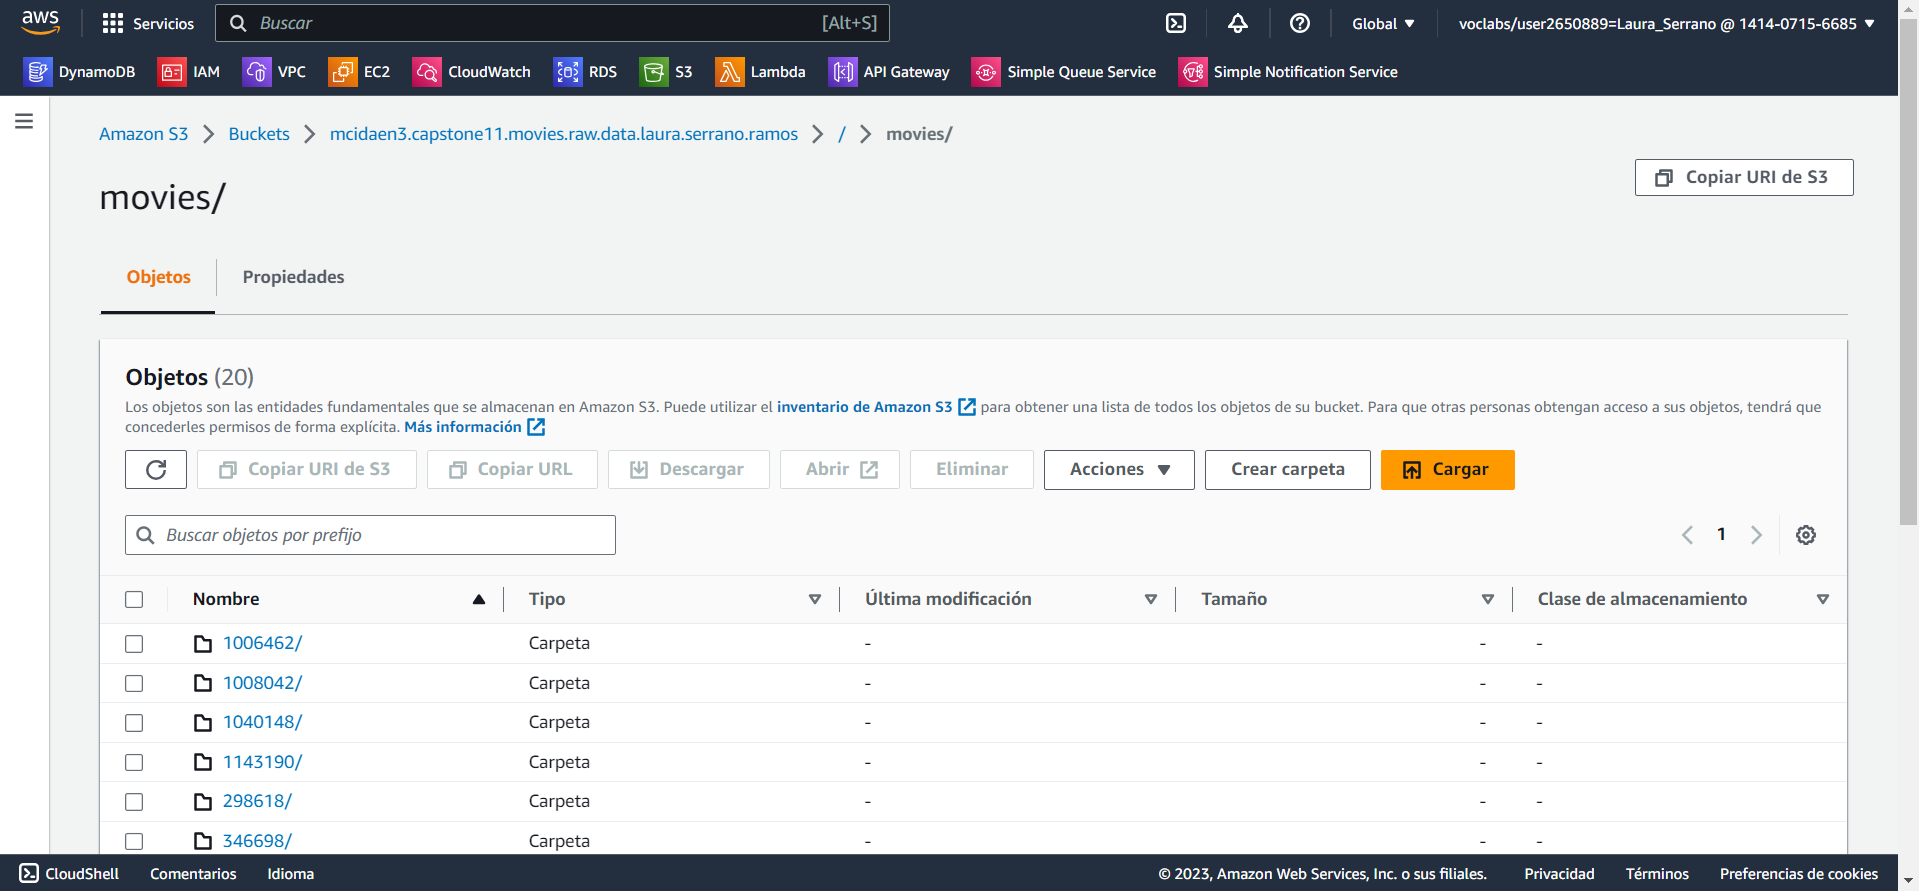
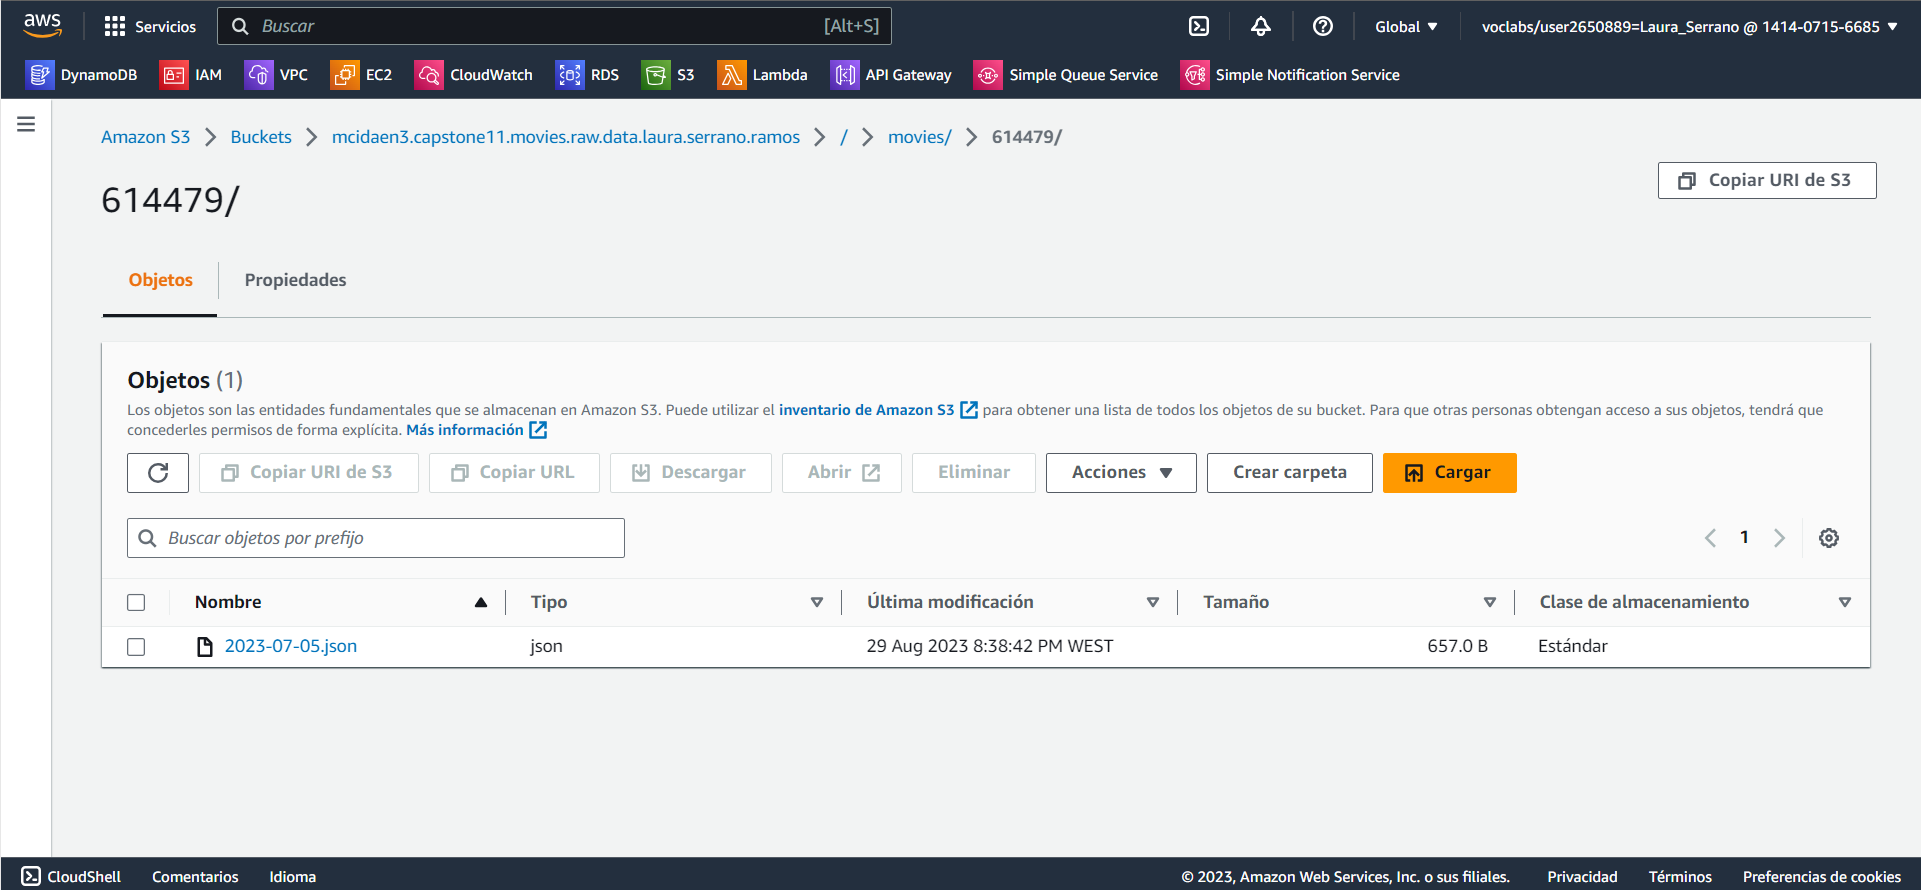
These are screenshots of the entries in DynamoDB:
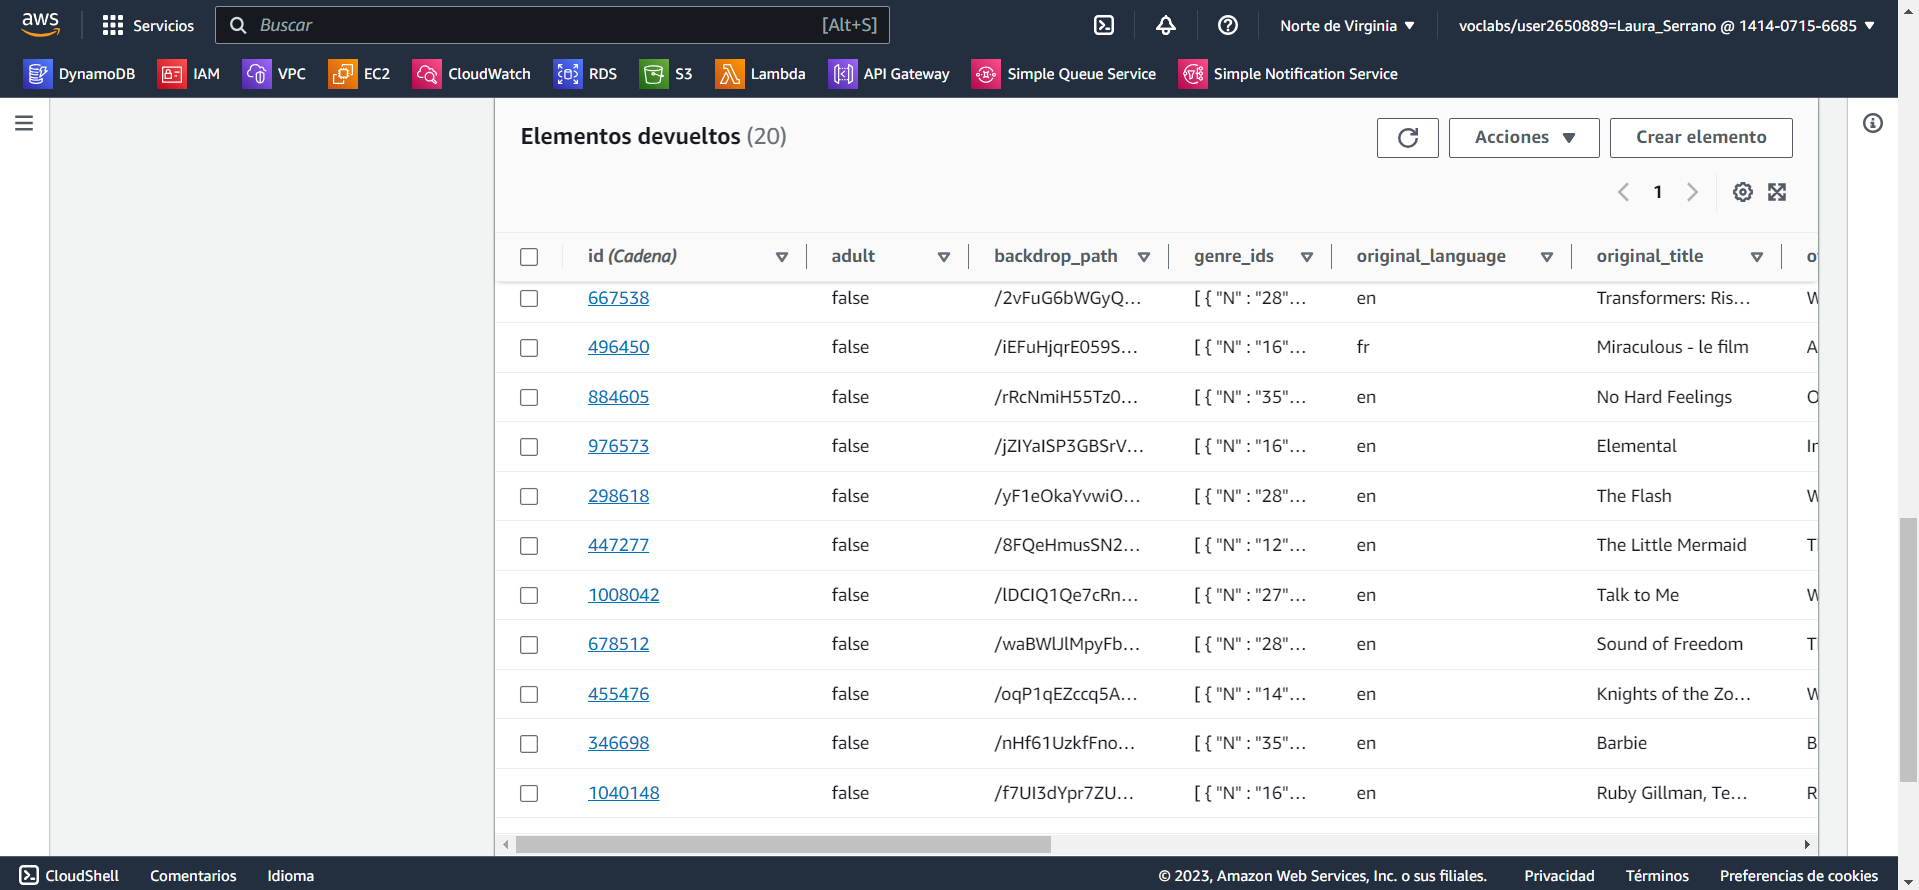
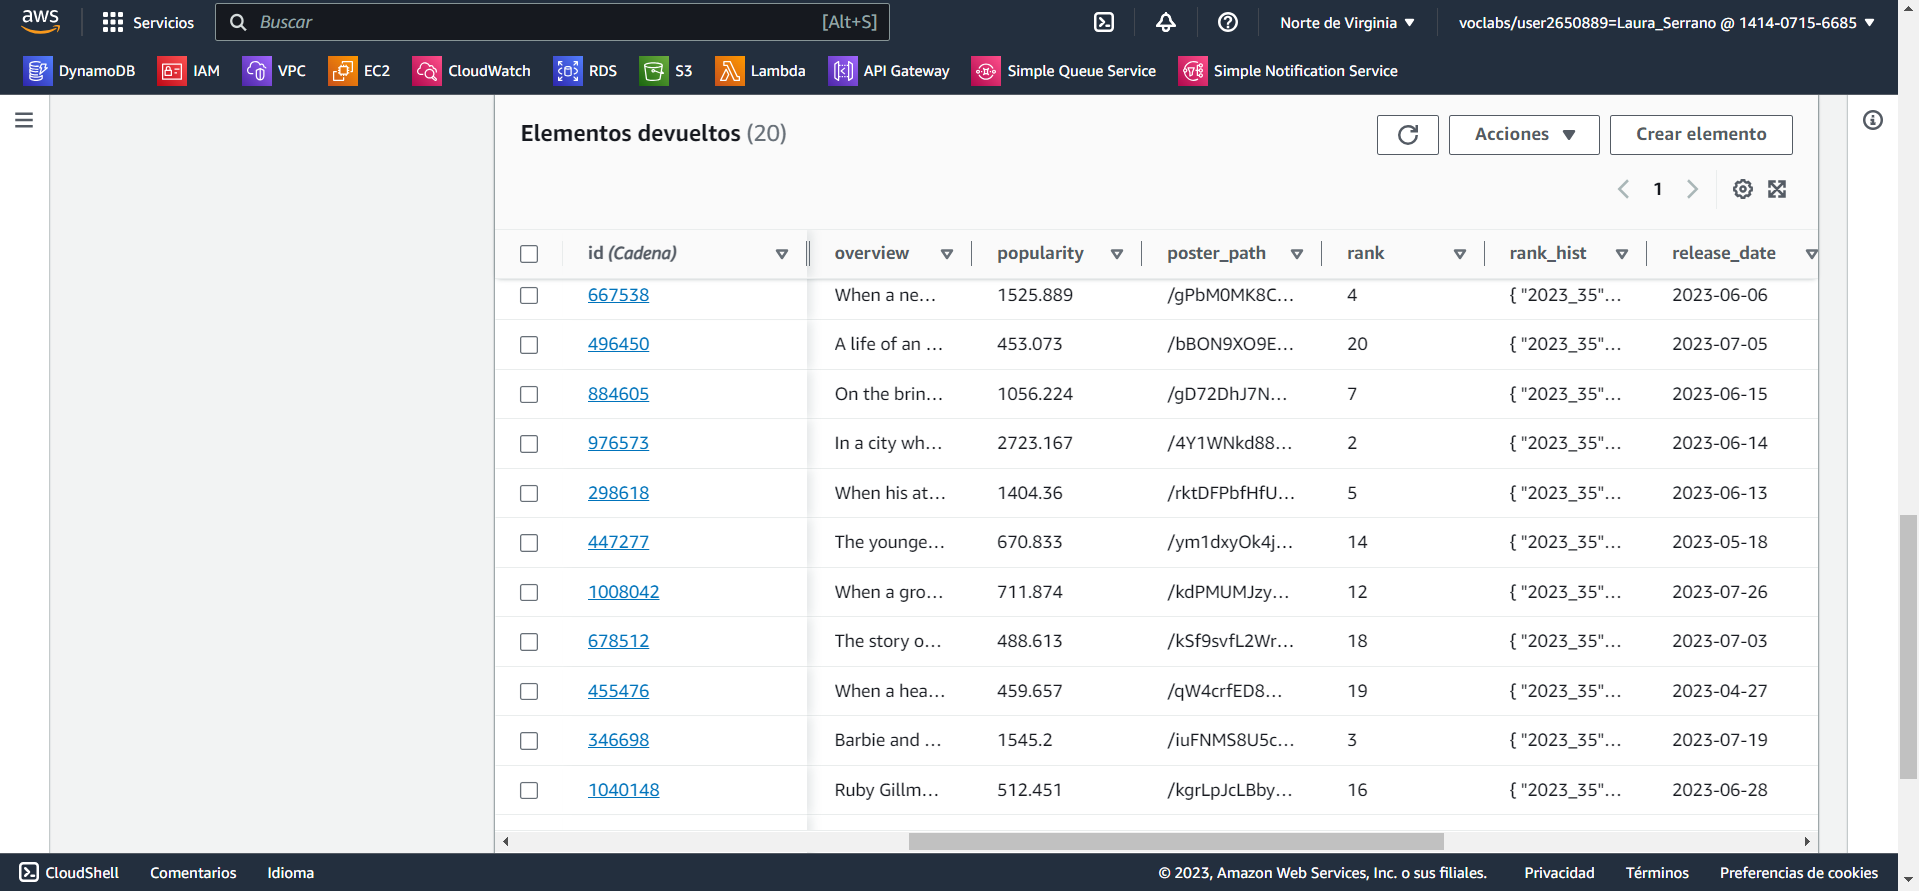
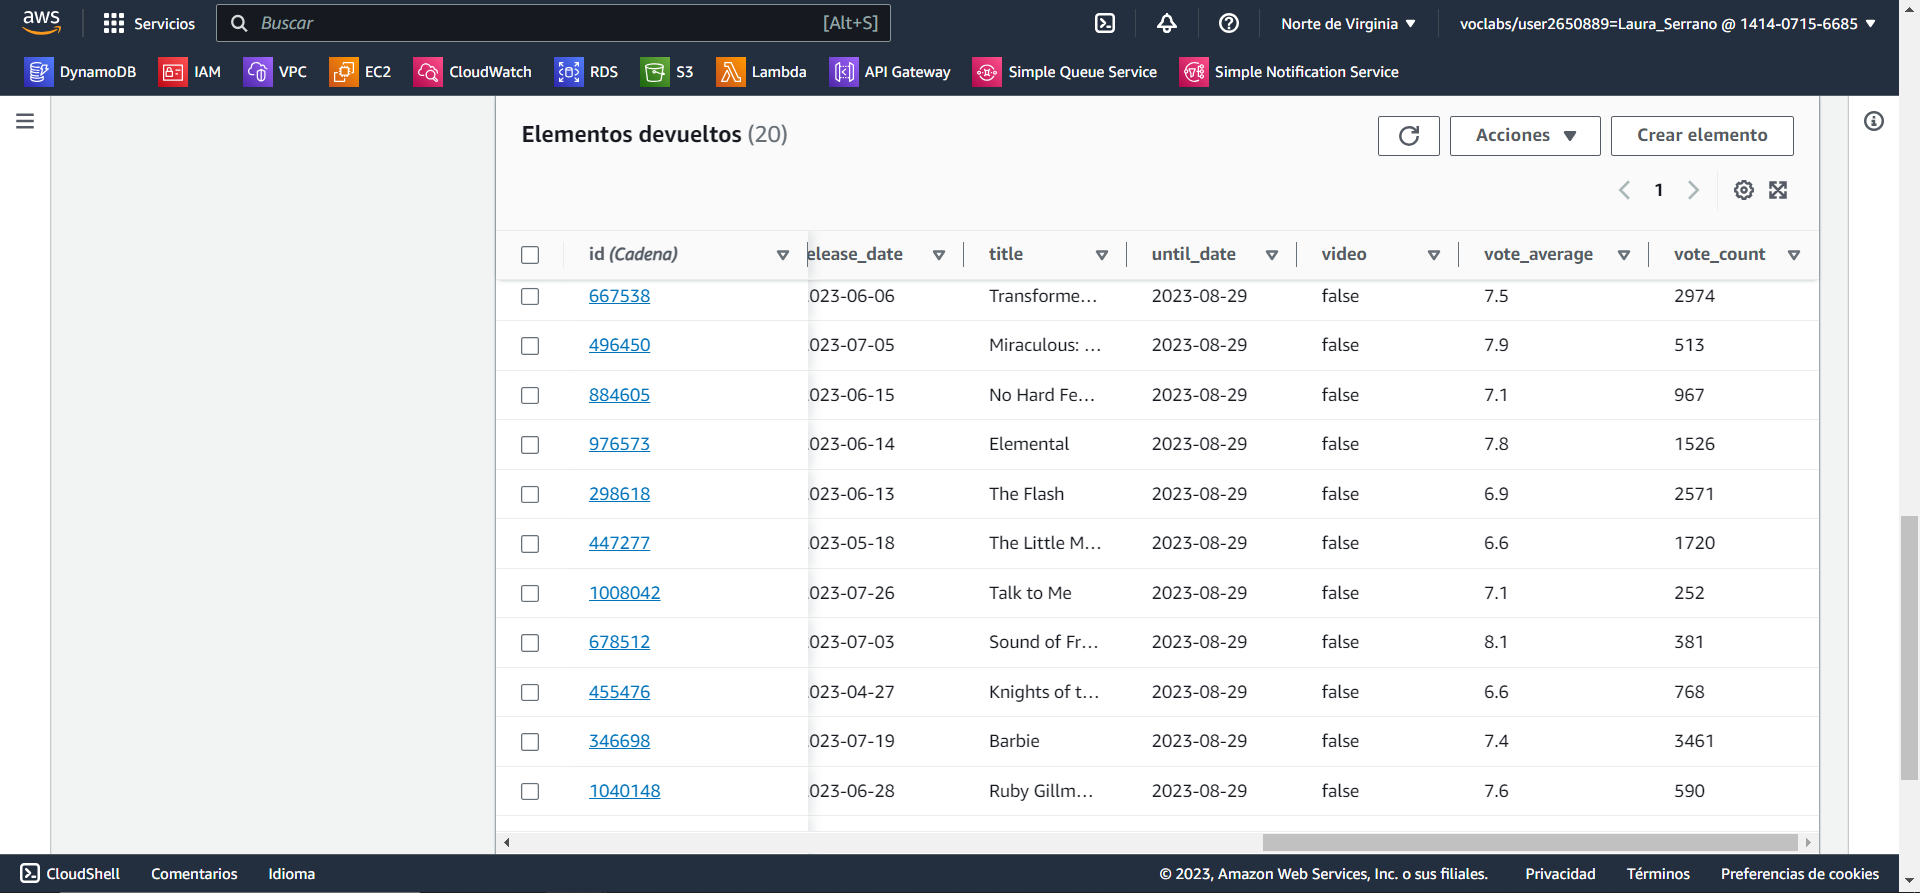
This is a screenshot of the metrics:
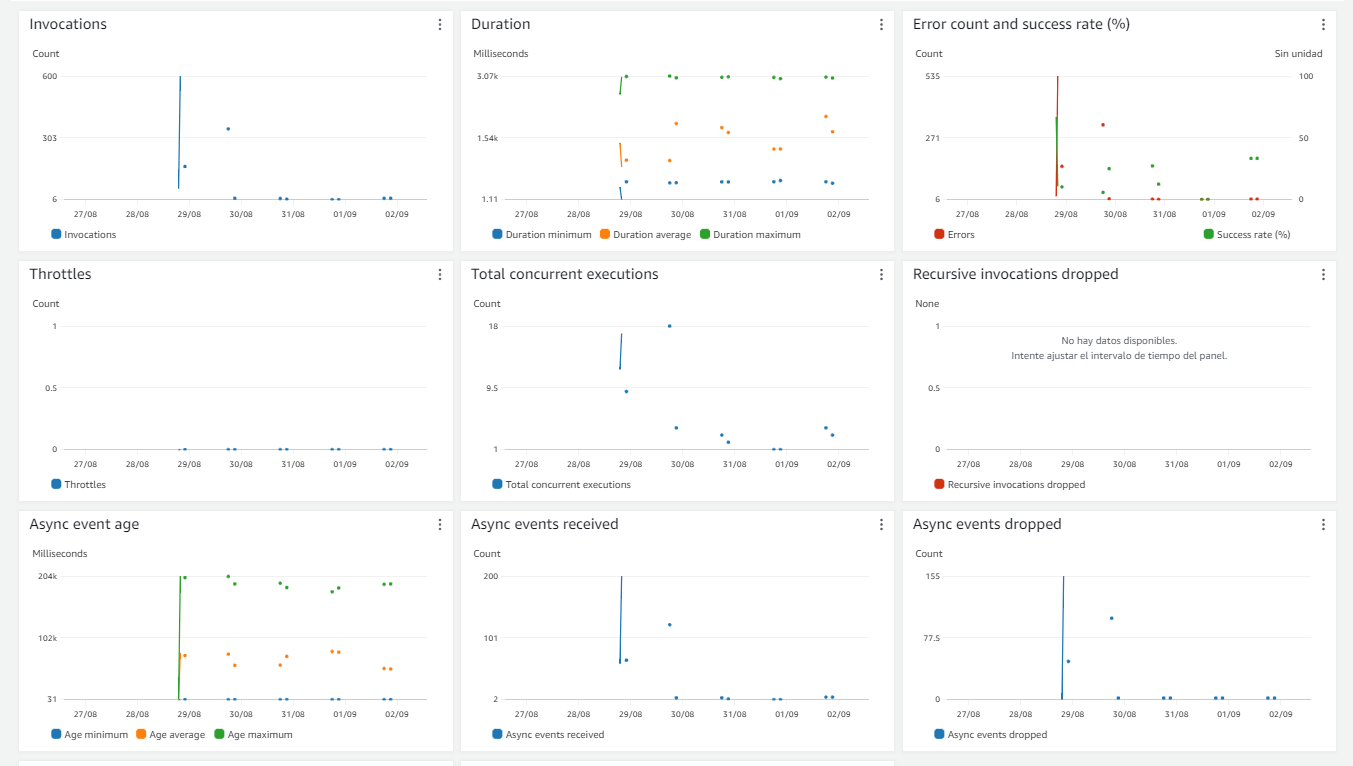

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 5:</b></font> Automation of data capture

Once we have all the pieces of the process, we want to proceed to automate data capture, which we will do through a lambda function deployed in the cloud.

This lambda function will have code similar to the one responsible for querying the Movies API and generating new objects in S3.
Once deployed, we will take care of adding a _trigger_ that executes it every 24 hours.

For the function to behave correctly, we will need it to handle additional dependencies to use the _requests_ library, which can be done through a _layer_. Additionally, we may need to modify the default parameters (timeout, memory, ...)

The following actions must be performed:

- Deploy a lambda function, similar to the one used in exercise 2, that queries the Movies API and generates .json objects in S3 as a result
- Resolved problems that allow the _requests_ library to be used through the use of the _layer_
- Modify the parameters of the lambda timeout/memory in case of execution problems
- Add a _trigger_ so that the function is executed every day

### Example of layer generation in linux/mac (check in Windows)

```
$ virtualenv --python="/usr/bin/python3.9" .venv
$ source .venv/
$ source .venv/bin/activate
$ mkdir python
$ cd python/
$ pip install requests -t ./
$ cd ..
$ zip -r python_modules.zip .
```

In [10]:
#Código de la funcion lambda Capstone11-Cidaen-LauraSerrano-API-Request
import boto3
import json
import botocore
from datetime import datetime
import requests

def lambda_handler(event, context):
    
    API_KEY = "8440ec54b30f5abe59fd822893eec8d0"
    response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={API_KEY}")
    dic = response.json()
    
    
    
    today = datetime.today()
    main_dict = {}
    i = 0
    NOMBRE_TABLA = "MoviesDB"
    s3_resource = boto3.resource('s3', region_name='us-east-1')
    dynamodb = boto3.client('dynamodb')
    dynamo_resource = boto3.resource('dynamodb', region_name='us-east-1')
    dynamo_table = dynamo_resource.Table(NOMBRE_TABLA)
    
    NOMBRE_BUCKET = "mcidaen3.capstone11.movies.raw.data.laura.serrano.ramos" # Creado desde la consola de AWS 
    now = datetime.now()
    year_month_day = now.strftime("%Y_%m_%d") # Obtener dígitos del año, mes y día


    # 1.- OBTENER DATOS DEL API MOVIES DB (COPIAD DEL EJERCICIO 1)

  
    for i, result in enumerate(dic["results"]):
        result["rank"] = i + 1
        
        result["until_date"] = today.strftime('%Y-%m-%d')
    
        year_week_number = f"{today.strftime('%Y')}_{today.strftime('%W')}"
        rank_hist = result.get("rank_hist", [])
        rank_hist.append({year_week_number: f"{result['rank']}"})
        result["rank_hist"] = rank_hist
        
    # 2.- CONFIGURAD EL CLIENTE Y RECURSO DE ACCESO A S3, Y VALIDAD SU USO (CREACIÓN DE CARPETA)
    
    s3_client = boto3.client('s3', region_name='us-east-1')
    s3_resource = boto3.resource('s3', region_name='us-east-1')

    s3_client.put_object(Bucket=NOMBRE_BUCKET, Key='movies/')
     


    # 3.- SUBID A S3 UN OBJETO POR RESULTADO OBTENIDO EN EL PASO 1



    for result in dic["results"]:
    
        ID_MOVIE = result["id"]
        AÑO_MES_DIA = result["release_date"]
    
        json_file_path = f"/movies/{ID_MOVIE}/{AÑO_MES_DIA}.json"

        
    
        cuerpo_objeto = json.dumps(result)
    
        s3_client.put_object(Bucket=NOMBRE_BUCKET, Key=json_file_path, Body=cuerpo_objeto)

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

- After all the steps, check that the function runs without problems
- Modify the trigger so that the function is executed every minute and wait 5 minutes
- Generate an image with a screenshot that shows the monitoring of the lambda function during the last 5 minutes, and save it in the path (next to the notebook) `/img/eje_5.png`
- Modify the trigger so that the function is executed every day

This is a screenshot of the function monitoring:
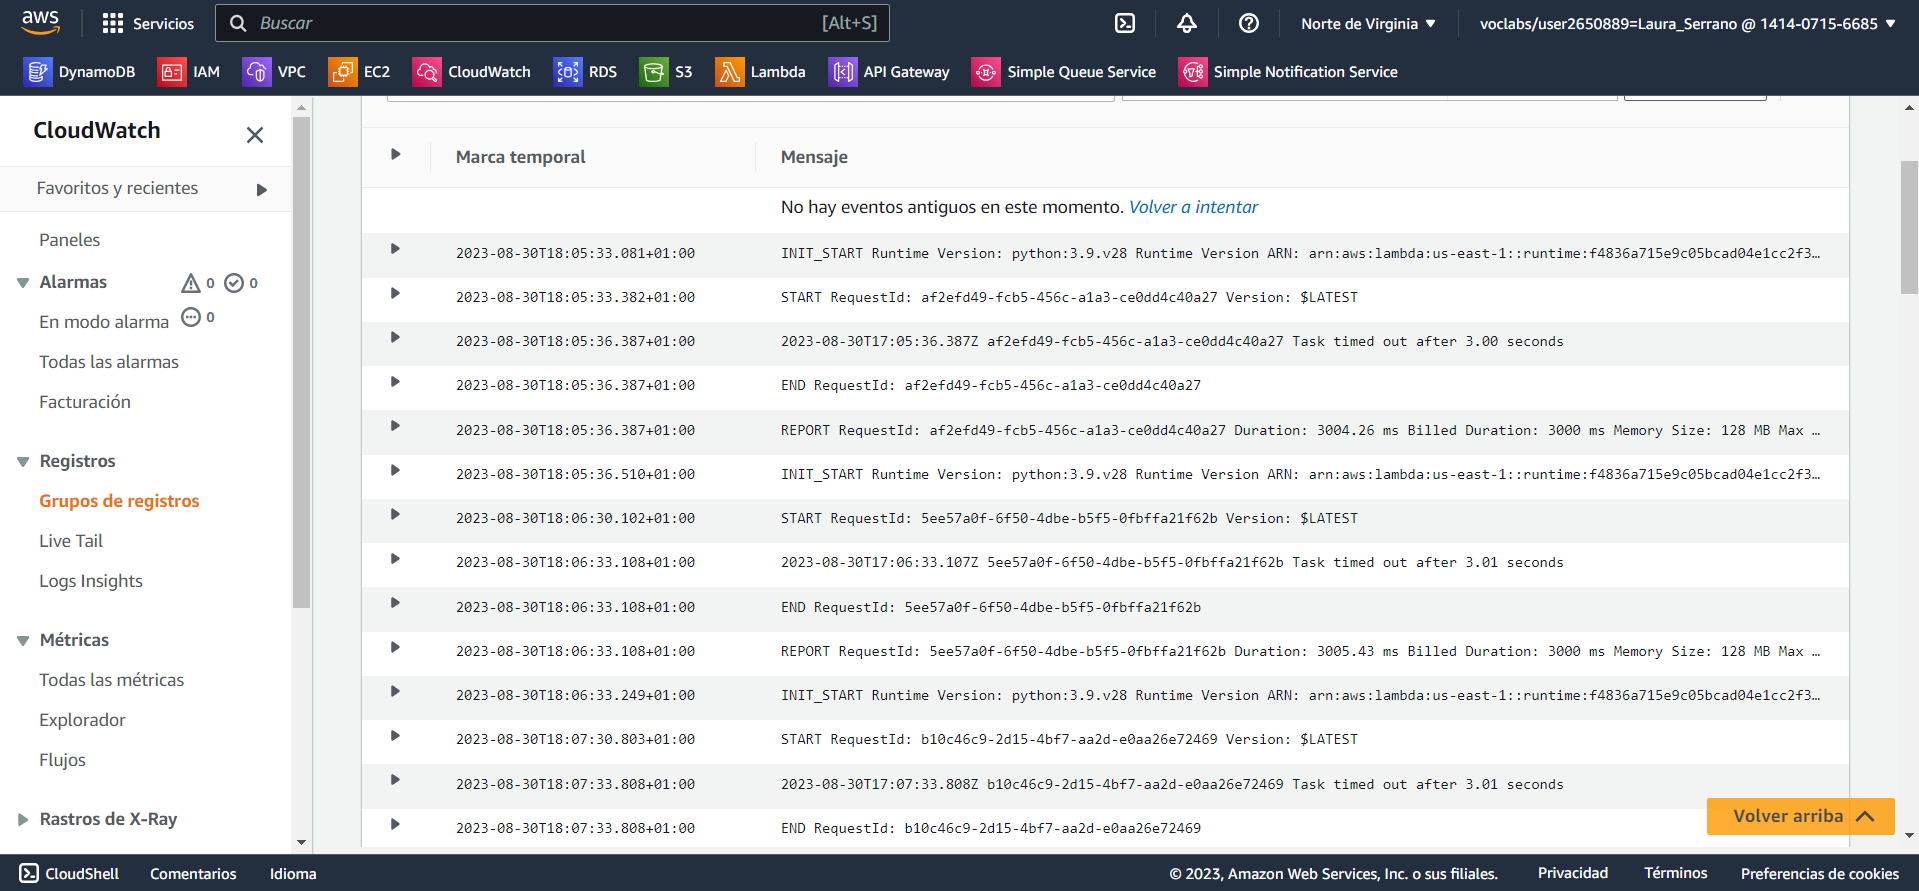
These are the metrics:
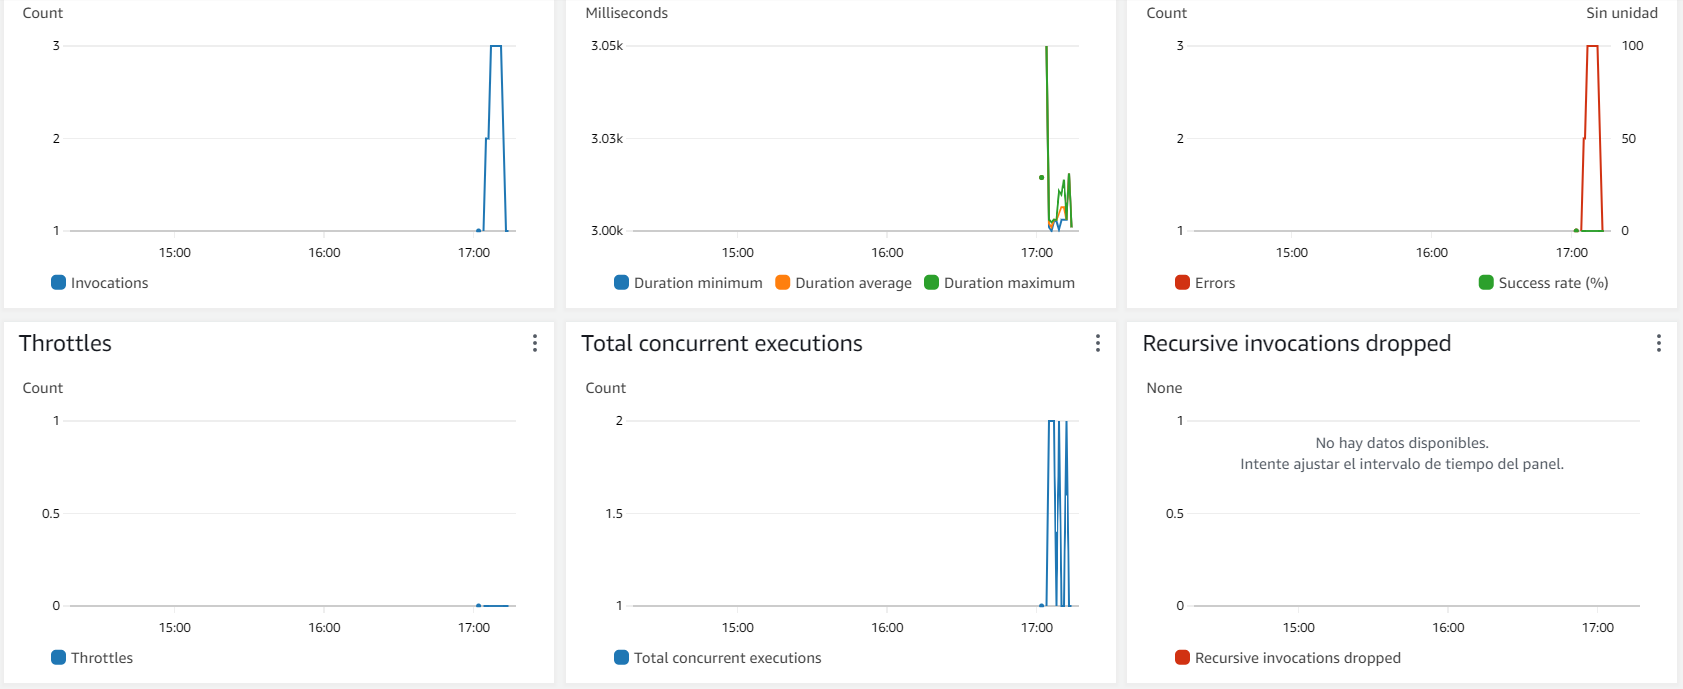
Among the files uploaded for the Capstone evaluation is one called "log-events-viewer-result-requests", which is the csv of the logs in cloudwatch 

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 6:</b></font> Movie listing API (given month and year)

During this exercise, we will develop a lambda function executed upon invocation of an API Gateway endpoint.

To do this, we will generate a lambda that, based on events with the following format: `{'pathParameters': {'month': '1', 'year': '2023'}}`, generates an appropriate list. This list is obtained from a query to the DynamoDB database using the following characteristics:
- Query of type _query_
- Query performed on the global secondary index
  - A value must be provided for the y_m field to get the correct data
- Descending sorting, so that the films with the highest ratings are obtained in the first positions
- Limit the query to 10 movies

So that the result (list of movies) can be interpreted correctly by API Gateway, we will include it as json in the lambda response, specifically in the `body` field (check the content of the code in cell 6.1).

Once the lambda has been developed, we can validate it locally by making the following call:

`lambda_handler({'pathParameters': {'month': '12', 'year': '2022'}}, None)`

After validating the lambda, we will deploy an API through API Gateway that allows its invocation. To do this, we will define 1 base resource called _/list_ ​​on which we will add 1 subresource _/list/{year}_ and a (sub)subresource _/list/{year}/ {month}_. On the last subresource (_{month}_) we will add a GET method, which will connect the calls made on `API_URL/stage/list/{year}/{month}` with the previous lambda , where_{year}_and_{month}_will be replaced by actual values.

The event received by the lambda will have the previously defined format

`{'pathParameters': {'month': 'MONTH', 'year': 'YEAR'}}`

The following actions must be performed:

- Develop a lambda from the following code cell, so that when executed with the previously defined event, it makes a query to DynamoDB
- Validate the lambda by deploying it to AWS and invoking it with a compatible event
- Deploy an API in API Gateway (non-private REST API) with the resources/methods already defined
  - Resource tree /list/{year}/{month}
  - Method: GET on {month}, invoking the previously deployed lambda, and activating the_lambda proxy integration_ option
- Preliminary validation of the API by making calls through POSTMAN type tools
    - Later we will validate the entire API

In [11]:
# CELDA 6.1 funcion Capstone11-Cidaen-LauraSerrano-API-DynamoDB

import boto3
import decimal
import json
from boto3.dynamodb.conditions import Key

NOMBRE_TABLA = "MoviesDB"
dynamo_resource = boto3.resource('dynamodb', region_name='us-east-1')
dynamo_table = dynamo_resource.Table(NOMBRE_TABLA)


class DecimalEncoder(json.JSONEncoder):       # Necesario para manejar los tipos Decimal
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            return str(o)
        return super(DecimalEncoder, self).default(o)
    
    
def lambda_handler(event, context):
    year = int(event['pathParameters']['year'])
    month = int(event['pathParameters']['month'])
    y_m = f'{year}_{month:02d}'
    # REALIZAR CONSULTA A DYNAMO DB CON YEAR_MONTH, Y DEJAR EL RESULTADO (lista) EN LA VARIABLE ITEMS
    
    response = dynamo_table.query(
        IndexName="y_m-val-index",
        KeyConditionExpression=Key('y_m').eq(f'{year}_{month}')
    )
    items = response.get('Items', [])
    
    return {
        'statusCode': 200,
        'body': json.dumps(items, cls=DecimalEncoder)
    } 

In [12]:
# VALIDACIÓN 

event = {'pathParameters': {'month': '12', 'year': '2022'}}
lambda_handler(event, {})


{'statusCode': 200, 'body': '[]'}

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 7:</b></font> API movie details (given its id)

During this exercise, we will develop another lambda function executed upon invocation of another API Gateway endpoint.

To do this, we will generate a lambda (initially developed in cell 7.1) that, from events with the following format: `{'pathParameters': {'id': '76600'}}`, obtains details for the movie with the id provided. The details are obtained from a query to the DynamoDB database using the following features:
- Query of type _get_item()_- Query performed on the table (using the partition key)
  - A value must be provided for the id field

So that the result (movie details) can be interpreted correctly by API Gateway, we will include it as json in the lambda response, specifically in the `body` field (check the content of the included code).

Once the lambda has been developed, we can validate it locally by making the following call:

`lambda_handler({'pathParameters': {'id': '76600'}}, None)`

After validating the lambda, we will deploy an API through API Gateway that allows its invocation. To do this, we will define 1 new base resource called _/movies_ on which we will add 1 subresource _/movies/{id}_. On the subresource (_{id}_) we will add a GET method, which will connect the calls made on `API_URL/stage/movies/{id}` with the previous lambda, where_ {id}_will be replaced by a real value.

The event received by the lambda will have the previously defined format

`{'pathParameters': {'id': 'MOVIE_ID'}}`

The following actions must be performed:

- Develop a lambda from the following code cell, so that when executed with the previously defined event, it makes a query to DynamoDB
- Validate the lambda by deploying it to AWS and invoking it with a compatible event
- Create the new resources/methods on the previously deployed API Gateway API
  - Resource tree /movies/{id}
  - Method: GET on {id}, invoking the previously deployed lambda, and activating the _lambda proxy integration_ option
- Deploy the API again using the deploy API option
- Preliminary validation of the API by making calls through POSTMAN type tools
    - Later we will validate the entire API

In [13]:
# CELDA 7.1 funcion Capstone11-Cidaen-LauraSerrano-API-Gateway

import boto3
import decimal
import json
from boto3.dynamodb.conditions import Key

NOMBRE_TABLA = "MoviesDB"
dynamo_resource = boto3.resource('dynamodb', region_name='us-east-1')
dynamo_table = dynamo_resource.Table(NOMBRE_TABLA)


class DecimalEncoder(json.JSONEncoder):       # Necesario para manejar los tipos Decimal
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            return str(o)
        return super(DecimalEncoder, self).default(o)
    
    
def lambda_handler(event, context):
    movie_id = event['pathParameters']['id']
    # REALIZAR CONSULTA A DYNAMO DB CON movie_id, Y DEJAR EL RESULTADO (DICT) EN LA VARIABLE ITEM
    response = dynamo_table.query(
        KeyConditionExpression=Key('id').eq(movie_id)
    )
    item = response.get('Items', [])
    
    return {
        'statusCode': 200,
        'body': json.dumps(item, cls=DecimalEncoder)
    } 

In [14]:
# VALIDACIÓN 

event = {'pathParameters': {'id': '76600'}}
lambda_handler(event, {})

{'statusCode': 200, 'body': '[]'}

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 8:</b></font> API validation through the use of IPWidgets.

To validate that everything works correctly, we have included a series of visual elements (widgets) that allow queries to the previously deployed API. To do this, we only have to include in the next cell the URL of the deployed API, including the stage, which we will have used in preliminary validations.

The following actions must be performed:

- Verify the operation of the widgets using the URL already provided (solution)
- Modify the subsequent cell to include the URL of the previously deployed API
- Check the operation of the widgets

In [15]:
BASE_URL = 'https://x525ljspii.execute-api.us-east-1.amazonaws.com/dev' # URL SOLUCIÓN --> PARA VALIDAR
# BASE_URL = 'REEMPLAZAD POR VUESTRA URL Y DESCOMENTAD'

In [16]:
!pip install ipywidgets==7.7.2

In [28]:
%matplotlib inline

import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from matplotlib.ticker import MaxNLocator    
    
def display_movie_info(year, month):    
    url = BASE_URL + f'/list/{year}/{month}'
    res = requests.get(url)
    data = res.json()
    
    dropdown_movies = widgets.Dropdown(
        options=[('title','id') for x in data],    
        description='Pelicula'
    )
    display(dropdown_movies)
    movie_data = widgets.interactive_output(display_movie, {'_id': dropdown_movies})
    display(movie_data)
    
def display_movie(_id):
    url = BASE_URL + f'/movies/{_id}'
    res = requests.get(url)
    data = res.json()
    if data:
        output1 = widgets.Output()
        with output1:
            poster_path = 'http://image.tmdb.org/t/p/w185'+data['poster_path']
            html = HTML(f'''
                <p>
                    <b>Estreno:</b> {data["release_date"]}</br>
                    <b>Hasta:</b> {data["until_date"]}</br>
                    <b>Votos:</b> {data["vote_count"]}</br>                    
                    <b>Media:</b> {data["vote_average"]}
                </p>
                <img src="{poster_path}" style=max-width:185px;"/>
            ''')
            display(html)

        output2 = widgets.Output()
        with output2:
            ranks = [int(value) for value in data['rank_history'].values()]
            weeks = list(data['rank_history'].keys())

            # Configurar grafica
            fig = plt.figure(figsize=(8, 5), dpi=100)
            ax = fig.gca()
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            plt.xticks(range(len(weeks)), weeks)
            plt.ylim(0, max(ranks) + 1)

            plt.title("Ranking semanal")
            plt.xlabel("Semana")
            plt.ylabel("Posición")

            # Dibujar grafica
            plt.plot(ranks, marker='o', linewidth=2) 
            plt.show()

        two_columns = widgets.HBox([output1, output2])
        display(two_columns)


dropdown_year = widgets.Dropdown(
    options=[2022, 2023],    
    description='Año'
)

dropdown_month = widgets.Dropdown(
    options=range(1, 13),    
    description='Mes'
)
movie_info = widgets.interactive_output(display_movie_info, {'year': dropdown_year, 'month': dropdown_month})

display(dropdown_year)
display(dropdown_month)
display(movie_info)

Dropdown(description='Año', options=(2022, 2023), value=2022)

Dropdown(description='Mes', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Output()

In [24]:
#Ejercicio 6
BASE_URL = 'https://ug6lspmuid.execute-api.us-east-1.amazonaws.com/prod'

In [25]:
%matplotlib inline

import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from matplotlib.ticker import MaxNLocator    
    
def display_movie_info(year, month):    
    url = BASE_URL + f'/list/{year}/{month}'
    res = requests.get(url)
    data = res.json()
    
    dropdown_movies = widgets.Dropdown(
        options=[(x['title'], x['id']) for x in data],    
        description='Pelicula'
    )
    display(dropdown_movies)
    movie_data = widgets.interactive_output(display_movie, {'_id': dropdown_movies})
    display(movie_data)
    
def display_movie(_id):
    url = BASE_URL + f'/movies/{_id}'
    res = requests.get(url)
    data = res.json()
    if data:
        output1 = widgets.Output()
        with output1:
            poster_path = 'http://image.tmdb.org/t/p/w185'+data['poster_path']
            html = HTML(f'''
                <p>
                    <b>Estreno:</b> {data["release_date"]}</br>
                    <b>Hasta:</b> {data["until_date"]}</br>
                    <b>Votos:</b> {data["vote_count"]}</br>                    
                    <b>Media:</b> {data["vote_average"]}
                </p>
                <img src="{poster_path}" style=max-width:185px;"/>
            ''')
            display(html)

        output2 = widgets.Output()
        with output2:
            ranks = [int(value) for value in data['rank_history'].values()]
            weeks = list(data['rank_history'].keys())

            # Configurar grafica
            fig = plt.figure(figsize=(8, 5), dpi=100)
            ax = fig.gca()
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            plt.xticks(range(len(weeks)), weeks)
            plt.ylim(0, max(ranks) + 1)

            plt.title("Ranking semanal")
            plt.xlabel("Semana")
            plt.ylabel("Posición")

            # Dibujar grafica
            plt.plot(ranks, marker='o', linewidth=2) 
            plt.show()

        two_columns = widgets.HBox([output1, output2])
        display(two_columns)


dropdown_year = widgets.Dropdown(
    options=[2022, 2023],    
    description='Año'
)

dropdown_month = widgets.Dropdown(
    options=range(1, 13),    
    description='Mes'
)
movie_info = widgets.interactive_output(display_movie_info, {'year': dropdown_year, 'month': dropdown_month})

display(dropdown_year)
display(dropdown_month)
display(movie_info)

Dropdown(description='Año', options=(2022, 2023), value=2022)

Dropdown(description='Mes', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Output()

In [26]:
#Ejercicio 7
BASE_URL = 'https://mal6hkei5e.execute-api.us-east-1.amazonaws.com/prod'

In [27]:
%matplotlib inline

import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from matplotlib.ticker import MaxNLocator    
    
def display_movie_info(year, month):    
    url = BASE_URL + f'/list/{year}/{month}'
    res = requests.get(url)
    data = res.json()
    
    dropdown_movies = widgets.Dropdown(
        options=[('title', 'id') for x in data],    
        description='Pelicula'
    )
    display(dropdown_movies)
    movie_data = widgets.interactive_output(display_movie, {'_id': dropdown_movies})
    display(movie_data)
    
def display_movie(_id):
    url = BASE_URL + f'/movies/{_id}'
    res = requests.get(url)
    data = res.json()
    if data:
        output1 = widgets.Output()
        with output1:
            poster_path = 'http://image.tmdb.org/t/p/w185'+data['poster_path']
            html = HTML(f'''
                <p>
                    <b>Estreno:</b> {data["release_date"]}</br>
                    <b>Hasta:</b> {data["until_date"]}</br>
                    <b>Votos:</b> {data["vote_count"]}</br>                    
                    <b>Media:</b> {data["vote_average"]}
                </p>
                <img src="{poster_path}" style=max-width:185px;"/>
            ''')
            display(html)

        output2 = widgets.Output()
        with output2:
            ranks = [int(value) for value in data['rank_history'].values()]
            weeks = list(data['rank_history'].keys())

            # Configurar grafica
            fig = plt.figure(figsize=(8, 5), dpi=100)
            ax = fig.gca()
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            plt.xticks(range(len(weeks)), weeks)
            plt.ylim(0, max(ranks) + 1)

            plt.title("Ranking semanal")
            plt.xlabel("Semana")
            plt.ylabel("Posición")

            # Dibujar grafica
            plt.plot(ranks, marker='o', linewidth=2) 
            plt.show()

        two_columns = widgets.HBox([output1, output2])
        display(two_columns)


dropdown_year = widgets.Dropdown(
    options=[2022, 2023],    
    description='Año'
)

dropdown_month = widgets.Dropdown(
    options=range(1, 13),    
    description='Mes'
)
movie_info = widgets.interactive_output(display_movie_info, {'year': dropdown_year, 'month': dropdown_month})

display(dropdown_year)
display(dropdown_month)
display(movie_info)

Dropdown(description='Año', options=(2022, 2023), value=2022)

Dropdown(description='Mes', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Output()

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> EXERCISE 9 (OPTIONAL):</b></font> Monitoring through Cloudwatch.

If you wish to go deeper/research into the use of Cloudwatch, an optional exercise is proposed for this purpose.

AWS Cloudwatch is a monitoring service that allows you to create panels/dashboards showing data about the operation of other services. For example, we can show the total invocations to lambda functions or the read capabilities of a DynamoDB table.

The exercise proposes the generation of a panel that shows data that, from your point of view, is relevant for monitoring the application as a whole. This exercise will be done entirely through the AWS console.

<font color="#00586D" size=3><b><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> VALIDATION</b></font>

- Generate an image with a screenshot that shows the developed Cloudwatch panel, and save it in the path (next to the notebook) `/img/eje_9.png`

<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#00586D"></i> </font></div>